# Predicting profile EV replacement - Multi-class
Only EV models under 250,000 PLN and all real scores categorized in classes. Total 934 profiles:

Firstly importing the libraries:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

Now we have to read the right file:

In [2]:
profiles = pd.read_csv('DATA/driving_profiles_cleared_MULTICLASS_21_1.csv')
profiles.head()

,monitoring_start_month,monitoring_days,active_days,data_quality_score,reliability_score,car_use_score,driver_behavior_score,n_trips,fuel_costs,body_type,...,average_pause_time,max_pause_time,median_pause_time,percentage_start_home,percentage_start_office,average_trip_duration_sec,percentage_charger_nearby,percentage_charger_fast_nearby,percentage_charger_3F_nearby,class_real_score
0,7,31,30,9.373888,4.692516,7.451583,6.467989,392,16625,VAN,...,5591.336735,133880,557.5,7.397959,4.591837,1098.109694,13.520408,5.867347,7.653061,1
1,6,30,27,9.062229,6.138472,7.616548,5.732751,314,17664,VAN,...,6739.085987,147051,703.0,8.280255,0.318471,1308.401274,13.057325,6.687898,6.369427,1
2,5,31,26,8.950726,5.415178,7.771661,6.493076,249,11769,VAN,...,9403.775100,224802,606.0,9.638554,0.000000,1075.341365,13.654618,5.622490,8.032129,1
3,3,92,78,9.003805,5.945673,7.027738,5.758369,789,17323,VAN,...,8688.593156,244481,606.0,9.632446,0.000000,1317.195184,14.575412,7.984791,6.590621,1
4,4,30,25,8.851813,5.518089,6.905178,5.513861,266,19741,VAN,...,8229.680451,238754,552.0,9.022556,0.000000,1374.330827,14.661654,8.646617,6.015038,1


Let's check the real score classes:
* Class 0 defines a profile that no EV recommendation was made
* Class 1 defines profiles where the real score of the best recommendation is less than 4. It means that the EV can only obtain 40% of its charging range through the current charging stations (dissapointing real score)
* Class 2 defines a profile that the real score is less than 6.5 (low real score)
* Class 3 defines a profile that the real score is less than 10 (great real score)
* Class 4 defines a profile that the real score is equal to 10 (perfect real score)

In [3]:
profiles.class_real_score.value_counts()

1    375
2    207
3    198
0     90
4     64
Name: class_real_score, dtype: int64

In [4]:
pd.set_option('display.max_columns', None)
profiles.head()

,monitoring_start_month,monitoring_days,active_days,data_quality_score,reliability_score,car_use_score,driver_behavior_score,n_trips,fuel_costs,body_type,driver_name,fuelcost_per_trip,distance_per_speed_limit_0_30,distance_per_speed_limit_30_50,distance_per_speed_limit_50_70,distance_per_speed_limit_70_90,distance_per_speed_limit_90_120,distance_per_speed_limit_120_plus,speed_limit_distribution_0_30,speed_limit_distribution_30_50,speed_limit_distribution_50_70,speed_limit_distribution_70_90,speed_limit_distribution_90_120,speed_limit_distribution_120_plus,distance_per_temp_class_minus_20,distance_per_temp_class_minus_20_minus_10,distance_per_temp_class_minus_10,distance_per_temp_class_minus_10_0,distance_per_temp_class_0_10,distance_per_temp_class_10,distance_per_temp_class_10_20,distance_per_temp_class_20_30,distance_per_temp_class_30,distance_with_temp_ratio,states_availability,range_drop_speed,range_drop_temp,tot_distance,distance_with_limits_ratio,tot_overspeeding_distance,overspeeding_ratio,overspeeding_distance_per_speed_limit_0_30,overspeeding_distance_per_speed_limit_30_50,overspeeding_distance_per_speed_limit_50_70,overspeeding_distance_per_speed_limit_70_90,overspeeding_distance_per_speed_limit_90_120,overspeeding_distance_per_speed_limit_120_plus,overspeeding_ratio_per_speed_limit_0_30,overspeeding_ratio_per_speed_limit_30_50,overspeeding_ratio_per_speed_limit_50_70,overspeeding_ratio_per_speed_limit_70_90,overspeeding_ratio_per_speed_limit_90_120,overspeeding_ratio_per_speed_limit_120_plus,tot_over_90_distance,over_90_ratio,tot_segments,segments_with_limits,speed_limits_availability,active_days_score,recorded_distance_ratio,average_trip_distance,max_trip_distance,median_trip_distance,average_pause_time,max_pause_time,median_pause_time,percentage_start_home,percentage_start_office,average_trip_duration_sec,percentage_charger_nearby,percentage_charger_fast_nearby,percentage_charger_3F_nearby,class_real_score
0,7,31,30,9.373888,4.692516,7.451583,6.467989,392,16625,VAN,Krzysztof Wiśniewski,42.410714,31.065438,1045.572419,472.041680,1895.572119,765.528969,1628.455597,0.005321,0.179090,0.080853,0.324682,0.131123,0.278929,0.0,0.0,0.0,0.000000,203.385457,5722.061870,0.0,0.0,0.0,0.997331,1.0,0.252275,0.003432,5941.305006,0.982652,106.960090,0.018003,1.677916,76.317962,20.657679,14.480418,5.354575,1.686416,0.054012,0.072992,0.043762,0.007639,0.006995,0.001036,827.204269,0.139229,9355,8021,0.857402,1.000000,0.944278,15.156390,183.674872,3.732314,5591.336735,133880,557.5,7.397959,4.591837,1098.109694,13.520408,5.867347,7.653061,1
1,6,30,27,9.062229,6.138472,7.616548,5.732751,314,17664,VAN,Krzysztof Wiśniewski,56.254777,22.359632,951.045894,508.402585,1847.312463,1195.831358,1101.285599,0.003974,0.169038,0.090363,0.328339,0.212545,0.195741,0.0,0.0,0.0,4.631399,217.225162,5459.420440,0.0,0.0,0.0,1.000000,1.0,0.235297,0.003987,5681.277001,0.990312,202.556031,0.035653,0.689212,69.913179,26.250802,34.561297,63.388661,40.813789,0.030824,0.073512,0.051634,0.018709,0.053008,0.037060,776.152901,0.136616,7718,6964,0.902306,0.900000,0.953004,18.093239,265.389898,3.879948,6739.085987,147051,703.0,8.280255,0.318471,1308.401274,13.057325,6.687898,6.369427,1
2,5,31,26,8.950726,5.415178,7.771661,6.493076,249,11769,VAN,Krzysztof Wiśniewski,47.265060,13.384671,714.907328,309.665114,1393.852563,463.130246,711.318029,0.003712,0.198241,0.085869,0.386509,0.128424,0.197245,0.0,0.0,0.0,0.000000,666.109968,2979.063999,0.0,0.0,0.0,1.000000,1.0,0.208368,0.018274,3645.173967,0.989324,68.395105,0.018763,0.101847,45.658871,15.560835,12.169358,0.424183,0.701252,0.007609,0.063867,0.050251,0.008731,0.000916,0.000986,362.531048,0.099455,6528,6030,0.923713,0.866667,0.922540,14.639253,178.330188,4.442763,9403.775100,224802,606.0,9.638554,0.000000,1075.341365,13.654618,5.622490,8.032129,1
3,3,92,78,9.003805,5.945673,7.027738,5.758369,789,17323,VAN,Krzysztof Wiśniewski,21.955640,46.283317,2881.813014,1345.942381,5408.641279,2184.797146,4113.447513,0.002896,0.18032

Next up, we have to create dummie variables for all the columns that have non continious numeric values:

In [5]:
profiles = pd.get_dummies(profiles, columns=['driver_name','body_type','monitoring_start_month'])

Here we can see the new shape of the data, 797 rows and 347 columns:

In [6]:
profiles.shape

(934, 158)

Fixing column names for lightGBM:

In [7]:
import re
profiles = profiles.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) #fix error lgb does not support json characters

### ML Preprocessing

Now we shuffle the data and separate the column we want to predict afterwards:

In [8]:
profiles = profiles.sample(frac = 1, random_state=9) #shuffling data
target = profiles['class_real_score'].copy() # target column separated
profiles = profiles.drop(['class_real_score'], axis=1) #deleting target column from data

Next up we define the folds to be used for cross-validation after in order to ensure repeatability. We will use `leave one out` meaning each time the model is trained on N-1 observations and test it on the Nth:

In [9]:
loo = KFold(profiles.shape[0], shuffle=True, random_state=123)
fold_50 = KFold(50, shuffle=True, random_state=123)
fold_10 = KFold(10, shuffle=True, random_state=123)
fold_20 = KFold(20, shuffle=True, random_state=123)
fold_100 = KFold(100, shuffle=True, random_state=123)
fold_250 = KFold(250, shuffle=True, random_state=123)

Now we define a function to print the mean and standard deviation for a list of scores:

In [10]:
def print_scores(scores):
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

#### Dummy classifier
In order to compare our results, we will use a dummy classifier that always predicts $1$ for every case. Metric of accuracy firstly:

In [11]:
dummy_classifier = DummyClassifier(strategy='most_frequent')

scores = cross_val_score(dummy_classifier, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs=-1)
print_scores(scores)

Mean: 0.4014989293361884
Standard Deviation: 0.49020152904502734


### Decision trees
Firstly we will try the decision trees. We will use `GridSearchCV` to find the best parameters while also using cross validation to evaluate the general accuracy of the model
* We define the parameters we want to check with grid-search:

In [12]:
parameters = {'criterion': ('gini','entropy'),
              'splitter': ('best', 'random'),
              'max_features':('sqrt',None,'log2'),
              'class_weight':(None,'balanced'),
              'max_depth':(None,20,50),
              'min_samples_leaf':(1,3),
              'ccp_alpha':(0,0.15, 0.3),
              'min_impurity_decrease':(0, 0.15, 0.3)
             }

Defining the decision tree classifier:

In [13]:
clf = tree.DecisionTreeClassifier(random_state=7)

Next up the grid search classifier is declared:

In [14]:
gs_clf = GridSearchCV(clf, parameters,n_jobs=7, cv=fold_10, scoring='accuracy', verbose=1)

Now we can fit the model on the existing data to find the best parameters:

In [15]:
gs_clf.fit(profiles, target)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done 1975 tasks      | elapsed:    4.8s
[Parallel(n_jobs=7)]: Done 5975 tasks      | elapsed:   13.9s
[Parallel(n_jobs=7)]: Done 11575 tasks      | elapsed:   27.2s
[Parallel(n_jobs=7)]: Done 12960 out of 12960 | elapsed:   30.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=7), n_jobs=7,
             param_grid={'ccp_alpha': (0, 0.15, 0.3),
                         'class_weight': (None, 'balanced'),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': (None, 20, 50),
                         'max_features': ('sqrt', None, 'log2'),
                         'min_impurity_decrease': (0, 0.15, 0.3),
                         'min_samples_leaf': (1, 3),
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [16]:
gs_clf.best_params_

{'ccp_alpha': 0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'splitter': 'random'}

We save the best estimator in a new variable to use it for cross-validation after: 

In [17]:
best_tree = gs_clf.best_estimator_

K-fold cross validation is used to make sure that the split of data does not affect the result.

Now, we check the accuracy since this metric gives a quick overview of the correctness of the predictions:

In [18]:
scores = cross_val_score(best_tree, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs=-1)
print_scores(scores)

Mean: 0.6381156316916489
Standard Deviation: 0.48054559854650297


### Random forest
Now we will try the same steps for random forest. Firstly, the parameters are set:

In [19]:
parameters = {'criterion': ('gini','entropy'),
              'n_estimators': (100, 150, 165,175,185, 200),
              'bootstrap':(True,False),
              'oob_score':(True,False),
              'class_weight':('balanced_subsample','balanced',None),
              'max_features':('auto','sqrt','log2',None),
              'warm_start':(True,False),
              'class_weight':(None,'balanced')
             }

Defining the random forest:

In [20]:
forest = RandomForestClassifier(random_state=7)

Next up the grid search classifier is declared:

In [21]:
gs_forest = GridSearchCV(forest, parameters,n_jobs=7, cv=fold_10, scoring='accuracy',verbose=1)

Now we can fit the model on the existing data to find the best parameters:

In [22]:
gs_forest.fit(profiles, target)

Fitting 10 folds for each of 768 candidates, totalling 7680 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    3.5s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   20.7s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:   48.8s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  1.9min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:  5.1min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:  7.9min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed: 11.9min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed: 16.0min
[Parallel(n_jobs=7)]: Done 4078 tasks      | elapsed: 22.0min
[Parallel(n_jobs=7)]: Done 5321 tasks      | elapsed: 26.0min
[Parallel(n_jobs=7)]: Done 6638 tasks      | elapsed: 32.0min
[Parallel(n_jobs=7)]: Done 7680 out of 7680 | elapsed: 37.6min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(random_state=7), n_jobs=7,
             param_grid={'bootstrap': (True, False),
                         'class_weight': (None, 'balanced'),
                         'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2', None),
                         'n_estimators': (100, 150, 165, 175, 185, 200),
                         'oob_score': (True, False),
                         'warm_start': (True, False)},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [23]:
gs_forest.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_features': None,
 'n_estimators': 175,
 'oob_score': True,
 'warm_start': True}

We save the best estimator in a new variable to use it for cross-validation after: 

In [24]:
best_forest = gs_forest.best_estimator_

Now k-fold cross validation with leave one out and for accuracy:

In [25]:
scores = cross_val_score(best_forest, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.7408993576017131
Standard Deviation: 0.4381409584906232


### Extremely randomized trees
Now we will try extremely randomized trees.
* Setting parameters:

In [26]:
parameters = {'criterion': ('gini','entropy'),
              'n_estimators': (50,55,60,65,70,75,80,90,100),
              'bootstrap':(True,False),
              'oob_score':(True,False),
              'max_features':('sqrt',None,'log2'),
              'warm_start':(True,False),
              'class_weight':(None,'balanced'),
              'max_depth':(None,10)
             }

Defining the extremely randomized trees:

In [27]:
extremely_rts = ExtraTreesClassifier(random_state=7)

Next up the grid search classifier is declared:

In [28]:
gs_random_trees = GridSearchCV(extremely_rts, parameters,n_jobs=7, cv=fold_10, scoring='accuracy',verbose=1)

Now we can fit the model on the existing data to find the best parameters:

In [29]:
gs_random_trees.fit(profiles, target)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    1.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    5.3s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:   16.9s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:   44.8s
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:   57.9s
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:  1.5min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed:  1.8min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed:  2.6min
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed:  3.3min
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed:  4.1min
[Parallel(n_jobs=7)]: Done 6036 tasks      | elapsed:  4.9min
[Parallel(n_jobs=7)]: Done 7186 tasks      | elapsed:  6.0min
[Parallel(n_jobs=7)]: Done 8436 tasks      | elapsed:  6.9min
[Parallel(n_jobs=7)]: Done 11599 tasks      | elapsed:  8.5min
[Parallel(n_jobs=7)]: Done 15702 tasks      | elapsed: 10.3m

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=ExtraTreesClassifier(random_state=7), n_jobs=7,
             param_grid={'bootstrap': (True, False),
                         'class_weight': (None, 'balanced'),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': (None, 10),
                         'max_features': ('sqrt', None, 'log2'),
                         'n_estimators': (50, 55, 60, 65, 70, 75, 80, 90, 100),
                         'oob_score': (True, False),
                         'warm_start': (True, False)},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [30]:
gs_random_trees.best_params_

{'bootstrap': False,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'n_estimators': 75,
 'oob_score': False,
 'warm_start': True}

We save the best estimator in a new variable to use it for cross-validation after: 

In [31]:
best_random_trees = gs_random_trees.best_estimator_

Now, k-fold cross validation with accuracy:

In [32]:
scores = cross_val_score(best_random_trees, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.7408993576017131
Standard Deviation: 0.4381409584906232


### Bagging classifier
Now we will try bagging classifier
* Setting parameters:

In [33]:
parameters = {'warm_start': (True,False),
              'bootstrap':(True,False),
              'oob_score':(True,False),
              'bootstrap_features':(True,False),
              'n_estimators': (15,35,55,75,95),
              'max_samples':(1,2),
              'max_features':(1,2)
             }

Defining the bagging classifier:

In [34]:
bagging_clf = BaggingClassifier(random_state=7)

Next up the grid search classifier is declared:

In [35]:
gs_bagging_clf = GridSearchCV(bagging_clf, parameters,n_jobs=7, cv=fold_10, scoring='accuracy',verbose=1)

Now we can fit the model on the existing data to find the best parameters:

In [36]:
gs_bagging_clf.fit(profiles, target)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    3.0s
[Parallel(n_jobs=7)]: Done 569 tasks      | elapsed:   12.1s
[Parallel(n_jobs=7)]: Done 1569 tasks      | elapsed:   29.1s
[Parallel(n_jobs=7)]: Done 2969 tasks      | elapsed:   44.3s
[Parallel(n_jobs=7)]: Done 3187 out of 3200 | elapsed:   46.8s remaining:    0.1s
[Parallel(n_jobs=7)]: Done 3200 out of 3200 | elapsed:   47.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=BaggingClassifier(random_state=7), n_jobs=7,
             param_grid={'bootstrap': (True, False),
                         'bootstrap_features': (True, False),
                         'max_features': (1, 2), 'max_samples': (1, 2),
                         'n_estimators': (15, 35, 55, 75, 95),
                         'oob_score': (True, False),
                         'warm_start': (True, False)},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [37]:
gs_bagging_clf.best_params_

{'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 1,
 'max_samples': 2,
 'n_estimators': 35,
 'oob_score': True,
 'warm_start': False}

We save the best estimator in a new variable to use it for cross-validation after: 

In [38]:
best_bagging_clf = gs_bagging_clf.best_estimator_

Firstly, k-fold cross validation with accuracy:

In [39]:
scores = cross_val_score(best_bagging_clf, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.4004282655246253
Standard Deviation: 0.4899851729323709


### AdaBoost classifier
Now we will try boost classifier
* Parameters:

In [41]:
parameters = {'algorithm': ('SAMME','SAMME.R'),
              'n_estimators': (50, 75, 100,125,150,175,200,225,250),
              'learning_rate':(0.3, 0.5,0.7,1, 1.25, 1.5)
             }

Defining the boost classifier:

In [42]:
clf = AdaBoostClassifier(random_state=7)

Next up the grid search classifier is declared:

In [43]:
gs_boost_clf = GridSearchCV(clf, parameters,n_jobs=7, cv=fold_10, scoring='accuracy',verbose=1)

Now we can fit the model on the existing data to find the best parameters:

In [44]:
gs_boost_clf.fit(profiles, target)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    7.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   34.3s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  1.3min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  2.3min
[Parallel(n_jobs=7)]: Done 1080 out of 1080 | elapsed:  3.1min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=AdaBoostClassifier(random_state=7), n_jobs=7,
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'learning_rate': (0.3, 0.5, 0.7, 1, 1.25, 1.5),
                         'n_estimators': (50, 75, 100, 125, 150, 175, 200, 225,
                                          250)},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [45]:
gs_boost_clf.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 175}

We save the best estimator in a new variable to use it for cross-validation after: 

In [46]:
best_boost_clf = gs_boost_clf.best_estimator_

Firstly, k-fold cross validation with accuracy:

In [47]:
scores = cross_val_score(best_boost_clf, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.6605995717344754
Standard Deviation: 0.47350583687923337


### Naive Baynes classifier
Now Gaussian classifier
* Parameters:

In [49]:
parameters = {'var_smoothing': (1e-9, 1e-10, 1e-11, 1e-12, 1e-13,1e-14),
              'priors': (None,[0.5, 0.5])
             }

Defining the model classifier:

In [50]:
gaussian = GaussianNB()

Next up the grid search classifier is declared:

In [51]:
gs_gaussian = GridSearchCV(gaussian, parameters,n_jobs=7, cv=fold_10, scoring='accuracy',verbose=1)

Now we can fit the model on the existing data to find the best parameters:

In [52]:
gs_gaussian.fit(profiles, target)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done 107 out of 120 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=7)]: Done 120 out of 120 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=GaussianNB(), n_jobs=7,
             param_grid={'priors': (None, [0.5, 0.5]),
                         'var_smoothing': (1e-09, 1e-10, 1e-11, 1e-12, 1e-13,
                                           1e-14)},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [53]:
gs_gaussian.best_params_

{'priors': None, 'var_smoothing': 1e-13}

We save the best estimator in a new variable to use it for cross-validation after: 

In [54]:
best_gaussian = gs_gaussian.best_estimator_

K-fold cross validation with accuracy:

In [55]:
scores = cross_val_score(best_gaussian, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.5995717344753747
Standard Deviation: 0.4899851729323709


### Support vector machines
Now we will try SVC.
* Firstly, the parameters:

In [57]:
parameters = {'SVC__C': (1, 1.15, 1.3, 1.45, 1.6),
              'SVC__kernel': ('linear','poly','rbf', 'sigmoid', 'precomputed'),
              'SVC__degree':(2,3,4),
              'SVC__gamma':('auto','scale'),
              'SVC__coef0':(0,0.5),
              'SVC__shrinking':(True, False),
              'SVC__probability':(True,False),
              'SVC__decision_function_shape':('ovo', 'ovr'),
              'SVC__tol':(1e-3, 1e-4, 1e-2)
             }

Defining the SVC classifier. In fact we have to create a pipeline because the SVM needs all the column data to be standardized meaning to have a mean of 0 and standard deviation of 1:

In [58]:
clf = Pipeline(steps = [ ('scaler',StandardScaler()), ('SVC',SVC(random_state=7))])

Next up the grid search classifier is declared:

In [59]:
gs_clf = GridSearchCV(clf, parameters,n_jobs=7, cv=fold_10, scoring='accuracy',verbose=1)

Now we can fit the model on the existing data to find the best parameters:

In [60]:
gs_clf.fit(profiles, target)

Fitting 10 folds for each of 7200 candidates, totalling 72000 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    4.4s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   16.2s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:   30.8s
[Parallel(n_jobs=7)]: Done 1454 tasks      | elapsed:  1.4min
[Parallel(n_jobs=7)]: Done 2412 tasks      | elapsed:  2.2min
[Parallel(n_jobs=7)]: Done 3809 tasks      | elapsed:  3.5min
[Parallel(n_jobs=7)]: Done 5187 tasks      | elapsed:  4.7min
[Parallel(n_jobs=7)]: Done 6505 tasks      | elapsed:  5.9min
[Parallel(n_jobs=7)]: Done 8649 tasks      | elapsed:  7.7min
[Parallel(n_jobs=7)]: Done 10348 tasks      | elapsed:  9.2min
[Parallel(n_jobs=7)]: Done 12290 tasks      | elapsed: 10.8min
[Parallel(n_jobs=7)]: Done 14780 tasks      | elapsed: 13.0min
[Parallel(n_jobs=7)]: Done 16654 tasks      | elapsed: 14.8min
[Parallel(n_jobs=7)]: Done 18962 tasks      | elapsed: 17.0min
[Parallel(n_jobs=7)]: Done 21239 tasks      | elapsed: 

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(random_state=7))]),
             n_jobs=7,
             param_grid={'SVC__C': (1, 1.15, 1.3, 1.45, 1.6),
                         'SVC__coef0': (0, 0.5),
                         'SVC__decision_function_shape': ('ovo', 'ovr'),
                         'SVC__degree': (2, 3, 4),
                         'SVC__gamma': ('auto', 'scale'),
                         'SVC__kernel': ('linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed'),
                         'SVC__probability': (True, False),
                         'SVC__shrinking': (True, False),
                         'SVC__tol': (0.001, 0.0001, 0.01)},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [61]:
gs_clf.best_params_

{'SVC__C': 1.6,
 'SVC__coef0': 0,
 'SVC__decision_function_shape': 'ovo',
 'SVC__degree': 2,
 'SVC__gamma': 'auto',
 'SVC__kernel': 'sigmoid',
 'SVC__probability': True,
 'SVC__shrinking': True,
 'SVC__tol': 0.01}

We save the best estimator in a new variable to use it for cross-validation after: 

In [62]:
best_svc = gs_clf.best_estimator_

K-fold cross validation with accuracy:

In [63]:
scores = cross_val_score(best_svc, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.6916488222698073
Standard Deviation: 0.46181243911635356


K-fold cross validation with f1:

In [64]:
scores = cross_val_score(best_svc, profiles, target,
                        cv=loo, scoring='f1_weighted',n_jobs = -1)
print_scores(scores)

Mean: 0.6916488222698073
Standard Deviation: 0.46181243911635356


### SGD 
Next up stochastic gradient descent. 
* Parameters:

In [40]:
parameters = {'SGD__loss': ('hinge','log','modified_huber','squared_hinge','perceptron'),
              'SGD__penalty': ('l1','l2','elasticnet'),
              'SGD__alpha': (0.001, 0.0001, 0.00001),
              'SGD__fit_intercept': (True, False),
              'SGD__validation_fraction':(0.1, 0.2),
              'SGD__early_stopping':(True, False),
              'SGD__learning_rate':('constant','optimal','invscaling','adaptive'),
              'SGD__eta0':(0.1,0.3,0.5),
              'SGD__tol':(1e-2,1e-3,1e-4),
              'SGD__class_weight': (None,'balanced'),
              'SGD__average':(True,False)
             }

Defining the SGD classifier. In fact we have to create a pipeline because the SGD needs all the column data to be standardized meaning to have a mean of 0 and standard deviation of 1:

In [41]:
clf = Pipeline(steps = [ ('scaler',StandardScaler()), ('SGD',SGDClassifier(random_state=7))])

Next up the grid search classifier is declared:

In [42]:
gs_clf = GridSearchCV(clf, parameters,n_jobs=7, cv=fold_10, scoring='accuracy',verbose=1)

Now we can fit the model on the existing data to find the best parameters:

In [43]:
gs_clf.fit(profiles, target)

Fitting 10 folds for each of 51840 candidates, totalling 518400 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    3.0s
[Parallel(n_jobs=7)]: Done 288 tasks      | elapsed:    6.4s
[Parallel(n_jobs=7)]: Done 788 tasks      | elapsed:   12.6s
[Parallel(n_jobs=7)]: Done 1488 tasks      | elapsed:   21.0s
[Parallel(n_jobs=7)]: Done 2388 tasks      | elapsed:   31.8s
[Parallel(n_jobs=7)]: Done 3488 tasks      | elapsed:  1.3min
[Parallel(n_jobs=7)]: Done 4788 tasks      | elapsed:  1.7min
[Parallel(n_jobs=7)]: Done 6288 tasks      | elapsed:  2.0min
[Parallel(n_jobs=7)]: Done 7988 tasks      | elapsed:  3.1min
[Parallel(n_jobs=7)]: Done 9888 tasks      | elapsed:  3.5min
[Parallel(n_jobs=7)]: Done 11988 tasks      | elapsed:  4.6min
[Parallel(n_jobs=7)]: Done 14288 tasks      | elapsed:  5.6min
[Parallel(n_jobs=7)]: Done 16788 tasks      | elapsed:  6.2min
[Parallel(n_jobs=7)]: Done 19488 tasks      | elapsed:  7.4min
[Parallel(n_jobs=7)]: Done 21568 tasks      | elapsed:  

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SGD', SGDClassifier(random_state=7))]),
             n_jobs=7,
             param_grid={'SGD__alpha': (0.001, 0.0001, 1e-05),
                         'SGD__average': (True, False),
                         'SGD__class_weight': (None, 'balanced'),
                         'SGD__early_stopping': (True, False),
                         'SGD__eta0': (0.1, 0.3, 0.5),
                         'SGD__fit_intercept': (True, False),
                         'SGD__learning_rate': ('constant', 'optimal',
                                                'invscaling', 'adaptive'),
                         'SGD__loss': ('hinge', 'log', 'modified_huber',
                                       'squared_hinge', 'perceptron'),
                         'SGD__penalty': ('l1', 'l2', 'elasticnet'),
                         'SGD__tol'

We can see the best parameters calculated from grid-search:

In [44]:
gs_clf.best_params_

{'SGD__alpha': 0.001,
 'SGD__average': False,
 'SGD__class_weight': 'balanced',
 'SGD__early_stopping': False,
 'SGD__eta0': 0.1,
 'SGD__fit_intercept': True,
 'SGD__learning_rate': 'optimal',
 'SGD__loss': 'log',
 'SGD__penalty': 'elasticnet',
 'SGD__tol': 0.01,
 'SGD__validation_fraction': 0.1}

We save the best estimator in a new variable to use it for cross-validation after: 

In [45]:
best_sgd = gs_clf.best_estimator_

K-fold cross validation with accuracy:

In [46]:
scores = cross_val_score(best_sgd, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.6991434689507494
Standard Deviation: 0.4586304381244903


### KNeighborsClassifier
Now k nearest neighbors will be used.
* Parameters:

In [47]:
parameters = {'n_neighbors': range(1,70),
              'weights': ('uniform','distance'),
              'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
              'p':(1,2),
              #'metric': ('precomputed','minkowski'),
              'leaf_size':(10,20,30,40)
             }

Defining the model classifier:

In [48]:
neigh_clf = KNeighborsClassifier()

Next up the grid search classifier is declared:

In [49]:
gs_neigh = GridSearchCV(neigh_clf, parameters,n_jobs=7, cv=fold_10, scoring='accuracy',verbose=1)

Now we can fit the model on the existing data to find the best parameters:

In [50]:
gs_neigh.fit(profiles, target)

Fitting 10 folds for each of 4416 candidates, totalling 44160 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  37 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done 611 tasks      | elapsed:    5.0s
[Parallel(n_jobs=7)]: Done 1611 tasks      | elapsed:   13.2s
[Parallel(n_jobs=7)]: Done 3011 tasks      | elapsed:   24.6s
[Parallel(n_jobs=7)]: Done 4811 tasks      | elapsed:   37.3s
[Parallel(n_jobs=7)]: Done 7011 tasks      | elapsed:   51.6s
[Parallel(n_jobs=7)]: Done 9611 tasks      | elapsed:  1.1min
[Parallel(n_jobs=7)]: Done 12611 tasks      | elapsed:  1.4min
[Parallel(n_jobs=7)]: Done 16011 tasks      | elapsed:  1.7min
[Parallel(n_jobs=7)]: Done 19811 tasks      | elapsed:  2.0min
[Parallel(n_jobs=7)]: Done 24011 tasks      | elapsed:  2.4min
[Parallel(n_jobs=7)]: Done 28611 tasks      | elapsed:  2.9min
[Parallel(n_jobs=7)]: Done 34603 tasks      | elapsed:  3.5min
[Parallel(n_jobs=7)]: Done 44160 out of 44160 | elapsed:  4.0min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=7,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': (10, 20, 30, 40),
                         'n_neighbors': range(1, 70), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [51]:
gs_neigh.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 54,
 'p': 1,
 'weights': 'distance'}

We save the best estimator in a new variable to use it for cross-validation after: 

In [52]:
best_neigh = gs_neigh.best_estimator_

K-fold cross validation with accuracy:

In [53]:
scores = cross_val_score(best_neigh, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.4443254817987152
Standard Deviation: 0.4968906801531447


### Logistic regression
Logistic regression will also be used.
* Parameters:

In [54]:
parameters = {'penalty': ('l1', 'l2', 'elasticnet', 'none'),
              'tol': (1e-3, 1e-4, 1e-5),
              'C':(0.8, 1 , 1.2),
              'fit_intercept':(True,False),
              'intercept_scaling': (0.8, 1, 1.2),
              'class_weight':('balanced',None),
              'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
              'multi_class':('auto', 'ovr', 'multinomial'),
              'warm_start':(True, False)
             }

Defining the model classifier:

In [55]:
clf = LogisticRegression(random_state=7, )

Next up the grid search classifier is declared:

In [56]:
gs_log_clf = GridSearchCV(clf, parameters,n_jobs=6, cv=fold_10, scoring='accuracy',verbose=1)

Now we can fit the model on the existing data to find the best parameters:

In [57]:
gs_log_clf.fit(profiles, target)

Fitting 10 folds for each of 12960 candidates, totalling 129600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 575 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 1642 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 2808 tasks      | elapsed:  5.4min
[Parallel(n_jobs=6)]: Done 4105 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 6094 tasks      | elapsed: 10.9min
[Parallel(n_jobs=6)]: Done 8569 tasks      | elapsed: 14.9min
[Parallel(n_jobs=6)]: Done 11194 tasks      | elapsed: 19.6min
[Parallel(n_jobs=6)]: Done 13950 tasks      | elapsed: 23.9min
[Parallel(n_jobs=6)]: Done 17286 tasks      | elapsed: 29.7min
[Parallel(n_jobs=6)]: Done 20986 tasks      | elapsed: 35.4min
[Parallel(n_jobs=6)]: Done 24671 tasks      | elapsed: 40.5min
[Parallel(n_jobs=6)]: Done 28961 tasks      | elapsed: 46.3min
[Parallel(n_jobs=6)]: Done 32780 tasks      | elapsed: 52.1min
[Parallel(n_jobs=6)]: Done 37491 tasks      | elapse

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=LogisticRegression(random_state=7), n_jobs=6,
             param_grid={'C': (0.8, 1, 1.2), 'class_weight': ('balanced', None),
                         'fit_intercept': (True, False),
                         'intercept_scaling': (0.8, 1, 1.2),
                         'multi_class': ('auto', 'ovr', 'multinomial'),
                         'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'),
                         'tol': (0.001, 0.0001, 1e-05),
                         'warm_start': (True, False)},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [58]:
gs_log_clf.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.001,
 'warm_start': True}

We save the best estimator in a new variable to use it for cross-validation after: 

In [59]:
best_log = gs_log_clf.best_estimator_

K-fold cross validation with accuracy:

In [60]:
scores = cross_val_score(best_log, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.7205567451820128
Standard Deviation: 0.4487256646936039


## LightGBM
Now we will try lightgbm:

In [61]:
import lightgbm as lgb

Setting parameters:

In [62]:
parameters = {'boosting_type': ('gbdt', 'dart', 'goss','rf'),
              'max_depth': (-1,-5,-10),
              'learning_rate':(0.1, 0.3, 0.5),
              'n_estimators':(100, 125,150,175, 200),
              'class_weight': (None,'balanced'),
              'min_child_weight':(1e-3,1e-4),
              'min_child_samples':(20,30)
             }

Defining the model classifier:

In [63]:
clf = lgb.LGBMClassifier(random_state=7)

Next up the grid search classifier is declared:

In [64]:
gs_lgb = GridSearchCV(clf, parameters,n_jobs=7, scoring='accuracy',verbose=1, cv=fold_10)

Now we can fit the model on the existing data to find the best parameters:

In [65]:
gs_lgb.fit(profiles, target)

Fitting 10 folds for each of 1440 candidates, totalling 14400 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   22.7s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  1.7min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  4.0min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  6.1min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:  7.8min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:  9.2min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed: 14.5min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed: 17.2min
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed: 22.3min
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed: 30.8min
[Parallel(n_jobs=7)]: Done 6036 tasks      | elapsed: 39.4min
[Parallel(n_jobs=7)]: Done 7186 tasks      | elapsed: 48.7min
[Parallel(n_jobs=7)]: Done 8436 tasks      | elapsed: 51.9min
[Parallel(n_jobs=7)]: Done 9786 tasks      | elapsed: 54.9min
[Parallel(n_jobs=7)]: Done 13945 tasks      | elapsed: 57.1mi

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=LGBMClassifier(random_state=7), n_jobs=7,
             param_grid={'boosting_type': ('gbdt', 'dart', 'goss', 'rf'),
                         'class_weight': (None, 'balanced'),
                         'learning_rate': (0.1, 0.3, 0.5),
                         'max_depth': (-1, -5, -10),
                         'min_child_samples': (20, 30),
                         'min_child_weight': (0.001, 0.0001),
                         'n_estimators': (100, 125, 150, 175, 200)},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [66]:
gs_lgb.best_params_

{'boosting_type': 'dart',
 'class_weight': None,
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'n_estimators': 175}

We save the best estimator in a new variable to use it for cross-validation after: 

In [67]:
best_lgb = gs_lgb.best_estimator_

K-fold cross validation with accuracy:

In [68]:
scores = cross_val_score(best_lgb, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.7366167023554604
Standard Deviation: 0.4404685416308723


## XGBoost

In [25]:
from xgboost import XGBClassifier

Setting parameters:

In [1]:
parameters = {'booster': ('dart', 'gblinear', 'gbtree'),
              'validate_parameters': (True,False),
              'objective':('reg:logistic','multi:softmax'),
              'base_score':(0.5,0.8),
              'eta':(0.3,0.75),
              'max_depth':(6,10),
              'eval_metric':('merror','mlogloss'),
              'rate_drop':(0,0.3)
             }

Defining the model classifier:

In [72]:
clf = XGBClassifier(seed=7, num_class=5)

Next up the grid search classifier is declared:

In [73]:
gs_xgb = GridSearchCV(clf, parameters,n_jobs=7, scoring='accuracy',verbose=1, cv=fold_10)

Now we can fit the model on the existing data to find the best parameters:

In [74]:
gs_xgb.fit(profiles, target)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  1.6min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  7.4min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed: 18.1min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed: 26.6min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed: 27.2min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed: 31.6min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed: 55.7min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed: 61.1min
[Parallel(n_jobs=7)]: Done 3840 out of 3840 | elapsed: 65.8min finished
C:\Users\stef4\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_wei...
                                     seed=7, subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=7,
             param_grid={'base_score': (0.5, 0.8),
                         'booster': ('dart', 'gblinear', 'gbtree'),
                    

We can see the best parameters calculated from grid-search:

In [75]:
gs_xgb.best_params_

{'base_score': 0.5,
 'booster': 'dart',
 'eta': 0.3,
 'eval_metric': 'merror',
 'max_depth': 6,
 'objective': 'reg:logistic',
 'rate_drop': 0,
 'validate_parameters': True}

We save the best estimator in a new variable to use it for cross-validation after: 

In [76]:
best_xgb = gs_xgb.best_estimator_

K-fold cross validation with accuracy:

In [77]:
scores = cross_val_score(best_xgb, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.7408993576017131
Standard Deviation: 0.4381409584906232


### PCA & SVM
Now we will try PCA:

In [115]:
params_clf = {'C': (1, 1.15, 1.3, 1.45, 1.6,1.75),
              'kernel': ('linear','poly','rbf', 'sigmoid', 'precomputed'),
              'degree':(2,3,4),
              'gamma':('auto','scale'),
              'coef0':(0,0.5),
              #'shrinking':(True, False),
              'probability':(True,False),
              'decision_function_shape':('ovo', 'ovr'),
              'tol':(1e-3, 1e-4, 1e-2)
             }

params_pca = { 'n_components': (50,60,70,80,90,100,110)
}

Changing the keys of the parameters in order to be identified correspondingly from the grid search:

In [116]:
new_params_clf = {'svc__' + key: params_clf[key] for key in params_clf}
new_params_pca = {'pca__' + key: params_pca[key] for key in params_pca}
new_params = dict(new_params_clf, **new_params_pca) #merging the dictionaries

Creating a pipeline that contains the standardscaler, PCA and the SVM:

In [117]:
pca_pipeline = make_pipeline(StandardScaler(), PCA(random_state=7), SVC(random_state=7))

Defining and fiting the grid-search classifier:

In [118]:
grid_pca = GridSearchCV(pca_pipeline, param_grid=new_params, cv=fold_10, scoring='accuracy',n_jobs=7, verbose=1)
grid_pca.fit(profiles, target)

Fitting 10 folds for each of 30240 candidates, totalling 302400 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    4.5s
[Parallel(n_jobs=7)]: Done 239 tasks      | elapsed:   10.3s
[Parallel(n_jobs=7)]: Done 689 tasks      | elapsed:   24.0s
[Parallel(n_jobs=7)]: Done 1268 tasks      | elapsed:   41.3s
[Parallel(n_jobs=7)]: Done 1929 tasks      | elapsed:  1.0min
[Parallel(n_jobs=7)]: Done 3007 tasks      | elapsed:  1.5min
[Parallel(n_jobs=7)]: Done 4102 tasks      | elapsed:  2.1min
[Parallel(n_jobs=7)]: Done 5378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=7)]: Done 6939 tasks      | elapsed:  3.4min
[Parallel(n_jobs=7)]: Done 8584 tasks      | elapsed:  4.2min
[Parallel(n_jobs=7)]: Done 10369 tasks      | elapsed:  5.1min
[Parallel(n_jobs=7)]: Done 12415 tasks      | elapsed:  6.1min
[Parallel(n_jobs=7)]: Done 14760 tasks      | elapsed:  7.2min
[Parallel(n_jobs=7)]: Done 17169 tasks      | elapsed:  8.5min
[Parallel(n_jobs=7)]: Done 19742 tasks      | elapsed:  

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(random_state=7)),
                                       ('svc', SVC(random_state=7))]),
             n_jobs=7,
             param_grid={'pca__n_components': (50, 60, 70, 80, 90, 100, 110),
                         'svc__C': (1, 1.15, 1.3, 1.45, 1.6, 1.75),
                         'svc__coef0': (0, 0.5),
                         'svc__decision_function_shape': ('ovo', 'ovr'),
                         'svc__degree': (2, 3, 4),
                         'svc__gamma': ('auto', 'scale'),
                         'svc__kernel': ('linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed'),
                         'svc__probability': (True, False),
                         'svc__tol': (0.001, 0.0001, 0.01)},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [119]:
grid_pca.best_params_

{'pca__n_components': 50,
 'svc__C': 1.6,
 'svc__coef0': 0.5,
 'svc__decision_function_shape': 'ovo',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'poly',
 'svc__probability': True,
 'svc__tol': 0.001}

We save the best estimator in a new variable to use it for cross-validation:

In [120]:
best_pca_svc = grid_pca.best_estimator_

K-fold cross validation with accuracy:

In [121]:
scores = cross_val_score(best_pca_svc, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.7012847965738758
Standard Deviation: 0.45769469154471676


### PCA & Random forest
Now we will try PCA:

In [122]:
params_clf = {'criterion': ('gini','entropy'),
              'n_estimators': (100, 150,170,190,210),
              'bootstrap':(True,False),
              'oob_score':(True,False),
              'class_weight':('balanced_subsample','balanced',None),
              'max_features':('auto','sqrt','log2'),
              'warm_start':(True,False),
              'class_weight':(None,'balanced')
             }

params_pca = { 'n_components': (60,70,80,90,100,110)
}

Changing the keys of the parameters in order to be identified correspondingly from the grid search:

In [123]:
new_params_clf = {'randomforestclassifier__' + key: params_clf[key] for key in params_clf}
new_params_pca = {'pca__' + key: params_pca[key] for key in params_pca}
new_params = dict(new_params_clf, **new_params_pca) #merging the dictionaries

Creating a pipeline that contains the standardscaler, PCA and the classifier:

In [124]:
pca_pipeline = make_pipeline(StandardScaler(), PCA(random_state=7), RandomForestClassifier(random_state=7))

Defining and fiting the grid-search classifier:

In [125]:
grid_pca = GridSearchCV(pca_pipeline, param_grid=new_params, cv=fold_10, scoring='accuracy',n_jobs=7, verbose=1)
grid_pca.fit(profiles, target)

Fitting 10 folds for each of 2880 candidates, totalling 28800 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    3.9s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   27.1s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  1.0min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  2.2min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:  3.8min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:  5.1min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed:  7.5min
[Parallel(n_jobs=7)]: Done 3256 tasks      | elapsed:  9.1min
[Parallel(n_jobs=7)]: Done 4148 tasks      | elapsed: 10.9min
[Parallel(n_jobs=7)]: Done 5098 tasks      | elapsed: 13.5min
[Parallel(n_jobs=7)]: Done 6148 tasks      | elapsed: 17.3min
[Parallel(n_jobs=7)]: Done 7298 tasks      | elapsed: 21.1min
[Parallel(n_jobs=7)]: Done 8548 tasks      | elapsed: 24.2min
[Parallel(n_jobs=7)]: Done 9926 tasks      | elapsed: 27.6min
[Parallel(n_jobs=7)]: Done 11376 tasks      | elapsed: 32.3mi

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(random_state=7)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=7))]),
             n_jobs=7,
             param_grid={'pca__n_components': (60, 70, 80, 90, 100, 110),
                         'randomforestclassifier__bootstrap': (True, False),
                         'randomforestclassifier__class_weight': (None,
                                                                  'balanced'),
                         'randomforestclassifier__criterion': ('gini',
                                                               'entropy'),
                         'randomforestclassifier__max_features': ('auto',
                                                                  'sqrt',
                  

We can see the best parameters calculated from grid-search:

In [126]:
grid_pca.best_params_

{'pca__n_components': 60,
 'randomforestclassifier__bootstrap': False,
 'randomforestclassifier__class_weight': 'balanced',
 'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__n_estimators': 190,
 'randomforestclassifier__oob_score': False,
 'randomforestclassifier__warm_start': True}

We save the best estimator in a new variable to use it for cross-validation:

In [127]:
best_pca_forest = grid_pca.best_estimator_

K-fold cross validation with accuracy:

In [128]:
scores = cross_val_score(best_pca_forest, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.6702355460385439
Standard Deviation: 0.4701274921390566


### PCA & Naive Baynes
Now we will try PCA:

In [129]:
params_clf = {'var_smoothing': (1e-9, 1e-10, 1e-11, 1e-12, 1e-13,1e-14),
              'priors': (None,[0.5, 0.5])
             }
params_pca = { 'n_components': (60,70,80,90,100,110,120)
}

Changing the keys of the parameters in order to be identified correspondingly from the grid search:

In [130]:
new_params_clf = {'gaussiannb__' + key: params_clf[key] for key in params_clf}
new_params_pca = {'pca__' + key: params_pca[key] for key in params_pca}
new_params = dict(new_params_clf, **new_params_pca) #merging the dictionaries

Creating a pipeline that contains the standardscaler, PCA and the classifier:

In [131]:
pca_pipeline = make_pipeline(StandardScaler(), PCA(random_state=7), GaussianNB())

Defining and fiting the grid-search classifier:

In [132]:
grid_pca = GridSearchCV(pca_pipeline, param_grid=new_params, cv=fold_10, scoring='accuracy',n_jobs=7, verbose=1)
grid_pca.fit(profiles, target)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  37 tasks      | elapsed:    0.6s
[Parallel(n_jobs=7)]: Done 611 tasks      | elapsed:    5.6s
[Parallel(n_jobs=7)]: Done 840 out of 840 | elapsed:    7.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(random_state=7)),
                                       ('gaussiannb', GaussianNB())]),
             n_jobs=7,
             param_grid={'gaussiannb__priors': (None, [0.5, 0.5]),
                         'gaussiannb__var_smoothing': (1e-09, 1e-10, 1e-11,
                                                       1e-12, 1e-13, 1e-14),
                         'pca__n_components': (60, 70, 80, 90, 100, 110, 120)},
             scoring='accuracy', verbose=1)

We can see the best parameters calculated from grid-search:

In [133]:
grid_pca.best_params_

{'gaussiannb__priors': None,
 'gaussiannb__var_smoothing': 1e-09,
 'pca__n_components': 60}

We save the best estimator in a new variable to use it for cross-validation:

In [134]:
best_pca_gaussian = grid_pca.best_estimator_

K-fold cross validation with accuracy:

In [135]:
scores = cross_val_score(best_pca_gaussian, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.619914346895075
Standard Deviation: 0.48540761160979706


### PCA & Logistic regression
Now we will try PCA:

In [136]:
params_clf = {'penalty': ('l1', 'l2', 'elasticnet', 'none'),
              'tol': (1e-3, 1e-4, 1e-5),
              'C':(0.8, 1 , 1.2),
              'fit_intercept':(True,False),
              'intercept_scaling': (0.8, 1, 1.2),
              'class_weight':('balanced',None),
              'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
              'multi_class':('auto', 'ovr', 'multinomial'),
              'warm_start':(True, False)
             }
params_pca = { 'n_components': (60,70,80,90,100,110,120)
}

Changing the keys of the parameters in order to be identified correspondingly from the grid search:

In [137]:
new_params_clf = {'logisticregression__' + key: params_clf[key] for key in params_clf}
new_params_pca = {'pca__' + key: params_pca[key] for key in params_pca}
new_params = dict(new_params_clf, **new_params_pca) #merging the dictionaries

Creating a pipeline that contains the standardscaler, PCA and the classifier:

In [138]:
pca_pipeline = make_pipeline(StandardScaler(), PCA(random_state=7), 
                             LogisticRegression(random_state=7, ))

Defining and fiting the grid-search classifier:

In [139]:
grid_pca = GridSearchCV(pca_pipeline, param_grid=new_params, cv=fold_10, scoring='accuracy',n_jobs=7, verbose=1)
grid_pca.fit(profiles, target)

Fitting 10 folds for each of 90720 candidates, totalling 907200 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  74 tasks      | elapsed:    0.7s
[Parallel(n_jobs=7)]: Done 674 tasks      | elapsed:    5.6s
[Parallel(n_jobs=7)]: Done 1520 tasks      | elapsed:   22.4s
[Parallel(n_jobs=7)]: Done 2074 tasks      | elapsed:   52.2s
[Parallel(n_jobs=7)]: Done 2524 tasks      | elapsed:  1.2min
[Parallel(n_jobs=7)]: Done 3074 tasks      | elapsed:  1.4min
[Parallel(n_jobs=7)]: Done 3724 tasks      | elapsed:  1.7min
[Parallel(n_jobs=7)]: Done 5163 tasks      | elapsed:  2.2min
[Parallel(n_jobs=7)]: Done 6913 tasks      | elapsed:  7.0min
[Parallel(n_jobs=7)]: Done 8297 tasks      | elapsed:  7.6min
[Parallel(n_jobs=7)]: Done 10593 tasks      | elapsed:  8.8min
[Parallel(n_jobs=7)]: Done 11743 tasks      | elapsed:  9.4min
[Parallel(n_jobs=7)]: Done 14060 tasks      | elapsed: 10.5min
[Parallel(n_jobs=7)]: Done 16324 tasks      | elapsed: 12.8min
[Parallel(n_jobs=7)]: Done 19090 tasks      | elapsed: 

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(random_state=7)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=7))]),
             n_jobs=7,
             param_grid={'logisticregression__C': (0.8, 1, 1.2),
                         'logisticregression__class_weight': ('balanced', None),
                         'logisticregression__fit_...
                         'logisticregression__multi_class': ('auto', 'ovr',
                                                             'multinomial'),
                         'logisticregression__penalty': ('l1', 'l2',
                                                         'elasticnet', 'none'),
                         'logisticregression__solver': ('newton-cg', 'lbfgs',
                                          

We can see the best parameters calculated from grid-search:

In [140]:
grid_pca.best_params_

{'logisticregression__C': 0.8,
 'logisticregression__class_weight': None,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 0.8,
 'logisticregression__multi_class': 'auto',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.001,
 'logisticregression__warm_start': True,
 'pca__n_components': 60}

We save the best estimator in a new variable to use it for cross-validation:

In [141]:
best_pca_logistic = grid_pca.best_estimator_

K-fold cross validation with accuracy:

In [142]:
scores = cross_val_score(best_pca_logistic, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.7312633832976445
Standard Deviation: 0.4433026590781142


## Neural network
Importing libraries:

In [11]:
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Setting up the standard scaler. Neural network need the attributes to be normalized:

In [12]:
scaler = StandardScaler()
scaler.fit(profiles)
#scaler.transform(profiles)

StandardScaler()

Method that creates a new model:

In [35]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=profiles.shape[1], activation='relu'))
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Defining the estimator:

In [36]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=150, batch_size=10, verbose=1)

<ipython-input-36-fe530f4bb8a0>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=150, batch_size=10, verbose=1)


Using 10 fold cross validation to check the accuracy:

In [147]:
scores = cross_val_score(estimator, scaler.transform(profiles), target, cv=fold_10, scoring='accuracy', n_jobs=-1, verbose=1)
print_scores(scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   39.1s remaining:   26.0s


Mean: 0.6905513612445666
Standard Deviation: 0.054545819461050714


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   48.6s finished


Using LOO croos validation (non-biased):

In [37]:
scores = cross_val_score(estimator, scaler.transform(profiles), target, cv=loo, scoring='accuracy', 
                         n_jobs=7, verbose=1)
print_scores(scores)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  3.2min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed: 14.2min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed: 33.3min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed: 59.8min


Mean: 0.6895074946466809
Standard Deviation: 0.46269526631762525


[Parallel(n_jobs=7)]: Done 934 out of 934 | elapsed: 70.8min finished


Defining a different neural network:

In [13]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=profiles.shape[1], activation='relu'))
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Defining the parameteres to fine tune:

In [149]:
params = {'epochs':(35,50,70,90,110,130),
          'batch_size':(5,10,20,30)
    
}

The neural network is set:

In [150]:
estimator = KerasClassifier(build_fn=baseline_model, verbose=1)

<ipython-input-150-d695b8515f05>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(build_fn=baseline_model, verbose=1)


Using grid search to fine tune the model:

In [151]:
grid_neural = GridSearchCV(estimator, param_grid=params, cv=fold_10, scoring='accuracy',n_jobs=7, verbose=1)
grid_neural.fit(scaler.transform(profiles), target)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  2.0min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  7.7min
[Parallel(n_jobs=7)]: Done 240 out of 240 | elapsed:  8.6min finished


Epoch 1/35
47/47 [==============================] - 0s 1ms/step - loss: 1.2449 - accuracy: 0.5064
Epoch 2/35
47/47 [==============================] - 0s 878us/step - loss: 0.6827 - accuracy: 0.7473
Epoch 3/35
47/47 [==============================] - 0s 897us/step - loss: 0.5443 - accuracy: 0.7837
Epoch 4/35
47/47 [==============================] - 0s 891us/step - loss: 0.4512 - accuracy: 0.8394
Epoch 5/35
47/47 [==============================] - 0s 585us/step - loss: 0.3856 - accuracy: 0.8651
Epoch 6/35
47/47 [==============================] - 0s 591us/step - loss: 0.3372 - accuracy: 0.8929
Epoch 7/35
47/47 [==============================] - 0s 717us/step - loss: 0.3003 - accuracy: 0.8994
Epoch 8/35
47/47 [==============================] - 0s 795us/step - loss: 0.2591 - accuracy: 0.9272
Epoch 9/35
47/47 [==============================] - 0s 813us/step - loss: 0.2288 - accuracy: 0.9454
Epoch 10/35
47/47 [==============================] - 0s 787us/step - loss: 0.2045 - accuracy: 0.9497
E

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027A46F65E80>,
             n_jobs=7,
             param_grid={'batch_size': (5, 10, 20, 30),
                         'epochs': (35, 50, 70, 90, 110, 130)},
             scoring='accuracy', verbose=1)

Printing the best parameters:

In [152]:
grid_neural.best_params_

{'batch_size': 20, 'epochs': 35}

The best estimator is saved:

In [153]:
best_neural = grid_neural.best_estimator_

Checking the cross-validation score:

In [154]:
scores = cross_val_score(best_neural, scaler.transform(profiles), target, cv=fold_10, scoring='accuracy', n_jobs=-1, verbose=1)
print_scores(scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.1s remaining:    3.4s


Mean: 0.6936742164264471
Standard Deviation: 0.051549235620318754


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.0s finished


Now the LOO cross-validation score:

In [15]:
scores = cross_val_score(best_neural, scaler.transform(profiles), target, cv=loo, scoring='accuracy', 
                         n_jobs=7, verbose=1)
print_scores(scores)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   44.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  2.9min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  6.0min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed: 10.6min


Mean: 0.7130620985010707
Standard Deviation: 0.4523323359901656


[Parallel(n_jobs=7)]: Done 934 out of 934 | elapsed: 12.5min finished


### Smote & Extra trees
Now we will try the smote technique to create new synthetic data: 

Now we will set different resampling strategies.In detail, we set the desired number of instances per class:

In [14]:
from imblearn.over_sampling import SMOTE

In [12]:
target.value_counts()

1    375
2    207
3    198
0     90
4     64
Name: class_real_score, dtype: int64

In [16]:
#settting the desired number of instances per class
smote_strategy1={
    0:140,
    1: 375,
    2: 207,
    3:198,
    4:110
}
smote_strategy2={
    0:140,
    1: 375,
    2: 207,
    3:198,
    4:110
}
smote_strategy3={
    0:100,
    1: 375,
    2: 207,
    3:198,
    4:80
}
smote_strategy4={
    0: 95,
    1: 375,
    2: 207,
    3:198,
    4:67
}

Setting up the parameters:

In [14]:
params_clf = {'criterion': ('gini','entropy'),
              'n_estimators': (65,70,75,80,85),

             }
params_oversampler = {'sampling_strategy': ('auto',smote_strategy1,smote_strategy2,smote_strategy3,smote_strategy4)
             }

Changing the keys of the parameters in order to be identified correspondingly from the grid search:

In [15]:
new_params_clf = {'extratreesclassifier__' + key: params_clf[key] for key in params_clf}
new_params_oversampler = {'smote__' + key: params_oversampler[key] for key in params_oversampler}
new_params = dict(new_params_clf, **new_params_oversampler) #merging the dictionaries

Creating a pipeline that contains the oversampler and classifier:

In [16]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              ExtraTreesClassifier(random_state=7, bootstrap=False,
                                                  class_weight= None,
                                                  max_depth=None, max_features=None, oob_score=False,
                                                  warm_start=True))

Defining and fiting the grid-search classifier:

In [17]:
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=fold_250, scoring='accuracy',n_jobs=7, verbose=1)
grid_imba.fit(profiles, target)

Fitting 250 folds for each of 50 candidates, totalling 12500 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    9.6s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   42.7s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  1.4min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  2.2min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:  3.2min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:  5.0min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed:  6.6min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed:  9.0min
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed: 11.5min
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed: 14.0min
[Parallel(n_jobs=7)]: Done 6036 tasks      | elapsed: 17.7min
[Parallel(n_jobs=7)]: Done 7186 tasks      | elapsed: 20.9min
[Parallel(n_jobs=7)]: Done 8436 tasks      | elapsed: 24.5min
[Parallel(n_jobs=7)]: Done 9786 tasks      | elapsed: 28.6min
[Parallel(n_jobs=7)]: Done 11236 tasks      | elapsed: 33.2mi

GridSearchCV(cv=KFold(n_splits=250, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('extratreesclassifier',
                                        ExtraTreesClassifier(max_features=None,
                                                             random_state=7,
                                                             warm_start=True))]),
             n_jobs=7,
             param_grid={'extratreesclassifier__criterion': ('gini', 'entropy'),
                         'extratreesclassifier__n_estimators': (65, 70, 75, 80,
                                                                85),
                         'smote__sampling_strategy': ('auto',
                                                      {0: 140, 1: 375, 2: 207,
                                                       3: 198, 4: 110},
                                                      {0: 140, 1: 375, 2: 207,
         

We can see the best parameters calculated from grid-search:

In [19]:
grid_imba.best_params_

{'extratreesclassifier__criterion': 'entropy',
 'extratreesclassifier__n_estimators': 70,
 'smote__sampling_strategy': {0: 95, 1: 375, 2: 207, 3: 198, 4: 67}}

We save the best estimator in a new variable to use it for cross-validation:

In [20]:
best_extra_smote = grid_imba.best_estimator_

K-fold cross validation with accuracy:

In [21]:
scores = cross_val_score(best_extra_smote, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.7601713062098501
Standard Deviation: 0.426978795053174


### Randomoversampler & Extra trees
Now we will try the oversampler technique to create new data: 

In [15]:
from imblearn.over_sampling import RandomOverSampler

Now we will set different resampling strategies.In detail, we set the desired number of instances per class:

In [23]:
target.value_counts()

1    375
2    207
3    198
0     90
4     64
Name: class_real_score, dtype: int64

In [15]:
#settting the desired number of instances per class
smote_strategy1={
    0:140,
    1: 375,
    2: 207,
    3:198,
    4:110
}
smote_strategy2={
    0:140,
    1: 375,
    2: 207,
    3:198,
    4:110
}
smote_strategy3={
    0:100,
    1: 375,
    2: 207,
    3:198,
    4:80
}
smote_strategy4={
    0: 95,
    1: 375,
    2: 207,
    3:198,
    4:67
}

Setting up the parameters:

In [25]:
params_clf = {'criterion': ('gini','entropy'),
              'n_estimators': (65,70,75,80,85),

             }
params_oversampler = {'sampling_strategy': ('auto',smote_strategy1,smote_strategy2,smote_strategy3,smote_strategy4)
             }

Changing the keys of the parameters in order to be identified correspondingly from the grid search:

In [26]:
new_params_clf = {'extratreesclassifier__' + key: params_clf[key] for key in params_clf}
new_params_oversampler = {'randomoversampler__' + key: params_oversampler[key] for key in params_oversampler}
new_params = dict(new_params_clf, **new_params_oversampler) #merging the dictionaries

Creating a pipeline that contains the oversampler and classifier:

In [27]:
imba_pipeline = make_pipeline(RandomOverSampler(random_state=42), 
                              ExtraTreesClassifier(random_state=7, bootstrap=False,
                                            class_weight= None,
                                            max_depth=None, max_features=None, oob_score=False,
                                            warm_start=True))

Defining and fiting the grid-search classifier:

In [28]:
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=fold_250, scoring='accuracy',n_jobs=7, verbose=1)
grid_imba.fit(profiles, target)

Fitting 250 folds for each of 50 candidates, totalling 12500 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    8.7s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:   39.0s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  1.3min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  2.0min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:  3.0min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:  4.6min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed:  6.1min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed:  8.4min
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed: 11.2min
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed: 14.0min
[Parallel(n_jobs=7)]: Done 6036 tasks      | elapsed: 17.6min
[Parallel(n_jobs=7)]: Done 7186 tasks      | elapsed: 20.6min
[Parallel(n_jobs=7)]: Done 8436 tasks      | elapsed: 23.9min
[Parallel(n_jobs=7)]: Done 9786 tasks      | elapsed: 28.0min
[Parallel(n_jobs=7)]: Done 11236 tasks      | elapsed: 32.7mi

GridSearchCV(cv=KFold(n_splits=250, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('extratreesclassifier',
                                        ExtraTreesClassifier(max_features=None,
                                                             random_state=7,
                                                             warm_start=True))]),
             n_jobs=7,
             param_grid={'extratreesclassifier__criterion': ('gini', 'entropy'),
                         'extratreesclassifier__n_estimators': (65, 70, 75, 80,
                                                                85),
                         'randomoversampler__sampling_strategy': ('auto',
                                                                  {0: 140,
                                                                   1: 375,
             

We can see the best parameters calculated from grid-search:

In [29]:
grid_imba.best_params_

{'extratreesclassifier__criterion': 'gini',
 'extratreesclassifier__n_estimators': 85,
 'randomoversampler__sampling_strategy': {0: 140,
  1: 375,
  2: 207,
  3: 198,
  4: 110}}

We save the best estimator in a new variable to use it for cross-validation:

In [30]:
best_extra_overs = grid_imba.best_estimator_

K-fold cross validation with accuracy:

In [31]:
scores = cross_val_score(best_extra_overs, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Mean: 0.7441113490364025
Standard Deviation: 0.43635954128634297


### SMOTE & RANDOM FOREST

In [32]:
params_clf = {'criterion': ('gini','entropy'),
              'n_estimators': (150,165,175,190,205),
              'bootstrap': (True,False)
             }

params_oversampler = {'sampling_strategy': ('auto',smote_strategy1,smote_strategy2,smote_strategy3,smote_strategy4)
             }

new_params_clf = {'randomforestclassifier__' + key: params_clf[key] for key in params_clf}
new_params_oversampler = {'smote__' + key: params_oversampler[key] for key in params_oversampler}
new_params = dict(new_params_clf, **new_params_oversampler) #merging the dictionaries

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(random_state=7,
                              class_weight= None, max_depth=None, max_features=None, oob_score=True, warm_start=True))

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=fold_250, scoring='accuracy',n_jobs=7, verbose=1)
grid_imba.fit(profiles, target)

print(grid_imba.best_params_)
best_forest_smote = grid_imba.best_estimator_

scores = cross_val_score(best_forest_smote, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Fitting 250 folds for each of 100 candidates, totalling 25000 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  1.3min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  6.0min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed: 10.9min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed: 16.2min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed: 22.6min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed: 36.0min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed: 46.0min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed: 63.7min
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed: 106.2min
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed: 122.7min
[Parallel(n_jobs=7)]: Done 6036 tasks      | elapsed: 146.7min
[Parallel(n_jobs=7)]: Done 7186 tasks      | elapsed: 175.9min
[Parallel(n_jobs=7)]: Done 8436 tasks      | elapsed: 210.2min
[Parallel(n_jobs=7)]: Done 9786 tasks      | elapsed: 251.1min
[Parallel(n_jobs=7)]: Done 11236 tasks      | elapsed: 

{'randomforestclassifier__bootstrap': True, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 205, 'smote__sampling_strategy': {0: 100, 1: 375, 2: 207, 3: 198, 4: 80}}
Mean: 0.7430406852248393
Standard Deviation: 0.4369567774110393


### Randomoversampler & RANDOM FOREST

In [33]:
params_clf = {'criterion': ('gini','entropy'),
              'n_estimators': (150,165,175,190,205),
              'bootstrap': (True,False)
             }

params_oversampler = {'sampling_strategy': ('auto',smote_strategy1,smote_strategy2,smote_strategy3,smote_strategy4)
             }

new_params_clf = {'randomforestclassifier__' + key: params_clf[key] for key in params_clf}
new_params_oversampler = {'randomoversampler__' + key: params_oversampler[key] for key in params_oversampler}
new_params = dict(new_params_clf, **new_params_oversampler) #merging the dictionaries

imba_pipeline = make_pipeline(RandomOverSampler(random_state=42), 
                              RandomForestClassifier(random_state=7,
                              class_weight= None, max_depth=None, max_features=None, oob_score=True, warm_start=True))

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=fold_250, scoring='accuracy',n_jobs=7, verbose=1)
grid_imba.fit(profiles, target)

print(grid_imba.best_params_)
best_forest_overs = grid_imba.best_estimator_

scores = cross_val_score(best_forest_overs, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Fitting 250 folds for each of 100 candidates, totalling 25000 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   59.7s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  4.6min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  8.7min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed: 13.8min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed: 19.9min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed: 30.7min
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed: 40.7min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed: 56.2min
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed: 72.3min
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed: 88.9min
[Parallel(n_jobs=7)]: Done 6036 tasks      | elapsed: 112.0min
[Parallel(n_jobs=7)]: Done 7186 tasks      | elapsed: 138.6min
[Parallel(n_jobs=7)]: Done 8436 tasks      | elapsed: 171.2min
[Parallel(n_jobs=7)]: Done 9786 tasks      | elapsed: 204.5min
[Parallel(n_jobs=7)]: Done 11236 tasks      | elapsed: 24

{'randomforestclassifier__bootstrap': True, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 165, 'randomoversampler__sampling_strategy': {0: 100, 1: 375, 2: 207, 3: 198, 4: 80}}
Mean: 0.7441113490364025
Standard Deviation: 0.43635954128634297


### SMOTE & XGBoost

In [16]:
params_oversampler = {'sampling_strategy': ('auto',smote_strategy1,smote_strategy2,smote_strategy3,smote_strategy4)
             }

new_params_oversampler = {'smote__' + key: params_oversampler[key] for key in params_oversampler}

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              XGBClassifier(seed=7, num_class=5, base_score=0.5, booster='dart', eta=0.3,
                                           eval_metric='merror', max_depth=6, objective='reg:logistic',
                                           rate_drop=0, validate_parameters=True))

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params_oversampler, cv=fold_250, scoring='accuracy',
                         n_jobs=7, verbose=1)
grid_imba.fit(profiles, target)

print(grid_imba.best_params_)
best_xgb_smote = grid_imba.best_estimator_

scores = cross_val_score(best_xgb_smote, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Fitting 250 folds for each of 5 candidates, totalling 1250 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  3.6min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed: 17.6min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed: 33.4min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed: 53.0min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed: 76.3min
[Parallel(n_jobs=7)]: Done 1250 out of 1250 | elapsed: 76.9min finished
C:\Users\stef4\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'smote__sampling_strategy': {0: 100, 1: 375, 2: 207, 3: 198, 4: 80}}
Mean: 0.7376873661670236
Standard Deviation: 0.4398917093610464


### Randomoversampler & XGBoost

In [17]:
params_oversampler = {'sampling_strategy': ('auto',smote_strategy1,smote_strategy2,smote_strategy3,smote_strategy4)
             }

new_params_oversampler = {'randomoversampler__' + key: params_oversampler[key] for key in params_oversampler}

imba_pipeline = make_pipeline(RandomOverSampler(random_state=42), 
                              XGBClassifier(seed=7, num_class=5, base_score=0.5, booster='dart', eta=0.3,
                                           eval_metric='merror', max_depth=6, objective='reg:logistic',
                                           rate_drop=0, validate_parameters=True))

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params_oversampler, cv=fold_250, 
                         scoring='accuracy',n_jobs=7, verbose=1)
grid_imba.fit(profiles, target)

print(grid_imba.best_params_)
best_xgb_overs = grid_imba.best_estimator_

scores = cross_val_score(best_xgb_overs, profiles, target,
                        cv=loo, scoring='accuracy',n_jobs = -1)
print_scores(scores)

Fitting 250 folds for each of 5 candidates, totalling 1250 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  3.7min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed: 18.3min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed: 34.2min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed: 51.3min
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed: 71.8min
[Parallel(n_jobs=7)]: Done 1250 out of 1250 | elapsed: 72.3min finished
C:\Users\stef4\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'randomoversampler__sampling_strategy': {0: 140, 1: 375, 2: 207, 3: 198, 4: 110}}
Mean: 0.734475374732334
Standard Deviation: 0.44161215862352743


### EXTRA TREES - Features
Now we will check the feature importances. We will use the exta trees classifier for that with the best parameters found:

In [55]:
extremely_rts = ExtraTreesClassifier(random_state=7, bootstrap=False, criterion='gini',
                                            class_weight= 'balanced', n_estimators=75,
                                            max_depth=None, max_features=None, oob_score=False,
                                            warm_start=True)

We have to fit the model

In [56]:
extremely_rts.fit(profiles, target)

C:\Users\stef4\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


ExtraTreesClassifier(class_weight='balanced', max_features=None,
                     n_estimators=75, random_state=7, warm_start=True)

#### Impurity feature importance
Find the most important features:

In [57]:
feat_importances = pd.Series(extremely_rts.feature_importances_, index=profiles.columns)
df_imp_feat = feat_importances.nlargest(profiles.shape[1])

Showcasing them in a graph:

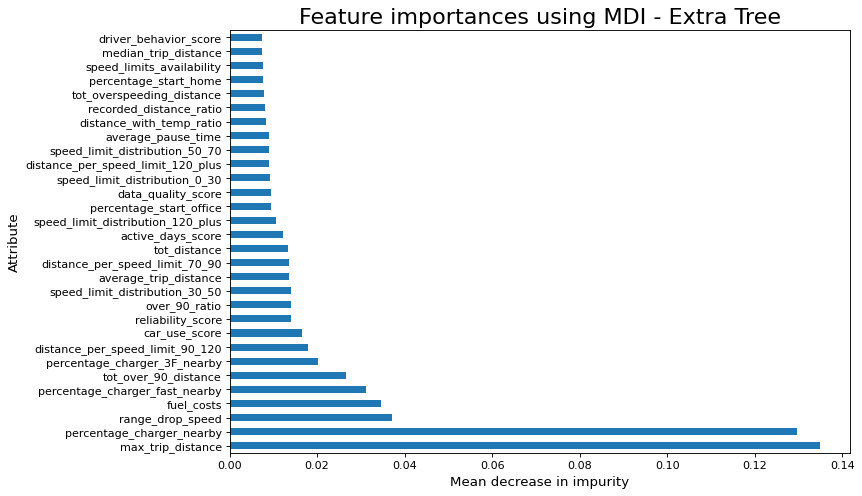

In [58]:
figure(figsize=(10, 7), dpi=80)
df_imp_feat[:30].plot(kind='barh')
plt.title('Feature importances using MDI - Extra Tree', fontdict ={'size': 20}, loc='center') #setting title
plt.xlabel('Mean decrease in impurity', fontdict ={'size': 12}) #setting x axis label
plt.ylabel('Attribute',fontdict ={'size': 12})  #setting y axis label
plt.show()

#### feature permutation based importance
Now we will calculate the permutation feature importance:

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    extremely_rts, profiles, target, n_repeats=20, random_state=44, n_jobs=7)

tree_importances = pd.Series(result.importances_mean, index=profiles.columns) #saving series 

tree_imp_sorted = tree_importances.nlargest(profiles.shape[1]) #sorting importances

Now we can plot the results:

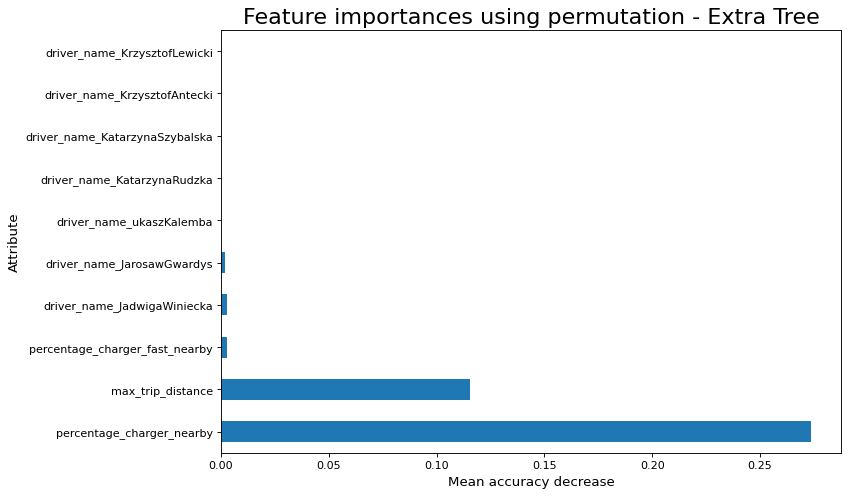

In [60]:
figure(figsize=(10, 7), dpi=80)
tree_imp_sorted[:10].plot(kind='barh')
plt.title('Feature importances using permutation - Extra Tree', fontdict ={'size': 20}, loc='center') #setting title
plt.xlabel('Mean accuracy decrease', fontdict ={'size': 12}) #setting x axis label
plt.ylabel('Attribute',fontdict ={'size': 12})  #setting y axis label
plt.show()

#### feature importance
Now we will find the feature importance

In [13]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import joblib
import sys
import statsmodels.api as sm
from numpy import NaN
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Defining the column names:

In [21]:
column_names = list(profiles.columns)

Running SFS:

In [63]:
sfs_extra = SFS(extremely_rts, 
           k_features= 65, 
           forward=True, 
           floating=True, 
           verbose=1,
           scoring='accuracy',
           cv=fold_10, n_jobs=-1)

sfs_extra = sfs_extra.fit(profiles, target,custom_feature_names=column_names)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:   26.6s finished
Features: 1/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:   37.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
Features: 2/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:   35.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:   47.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    7.2s finished
Features: 20/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:   47.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.4s finished
Features: 21/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed:   47.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elap

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   51.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   15.8s finished
Features: 37/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   51.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   16.4s finished
Features: 38/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elap

In [65]:
sfs_extra.subsets_

{1: {'feature_idx': (58,),
  'cv_scores': array([0.44680851, 0.46808511, 0.5106383 , 0.44680851, 0.47311828,
         0.60215054, 0.51612903, 0.49462366, 0.5483871 , 0.51612903]),
  'avg_score': 0.5022878059940517,
  'feature_names': ('max_trip_distance',)},
 2: {'feature_idx': (58, 66),
  'cv_scores': array([0.61702128, 0.63829787, 0.69148936, 0.58510638, 0.59139785,
         0.66666667, 0.65591398, 0.65591398, 0.66666667, 0.56989247]),
  'avg_score': 0.6338366506520248,
  'feature_names': ('max_trip_distance', 'percentage_charger_nearby')},
 3: {'feature_idx': (45, 58, 66),
  'cv_scores': array([0.60638298, 0.64893617, 0.80851064, 0.62765957, 0.67741935,
         0.68817204, 0.69892473, 0.66666667, 0.7311828 , 0.72043011]),
  'avg_score': 0.6874285060626859,
  'feature_names': ('overspeeding_ratio_per_speed_limit_30_50',
   'max_trip_distance',
   'percentage_charger_nearby')},
 4: {'feature_idx': (4, 45, 58, 66),
  'cv_scores': array([0.57446809, 0.67021277, 0.78723404, 0.70212766, 

Now we can plot the results:

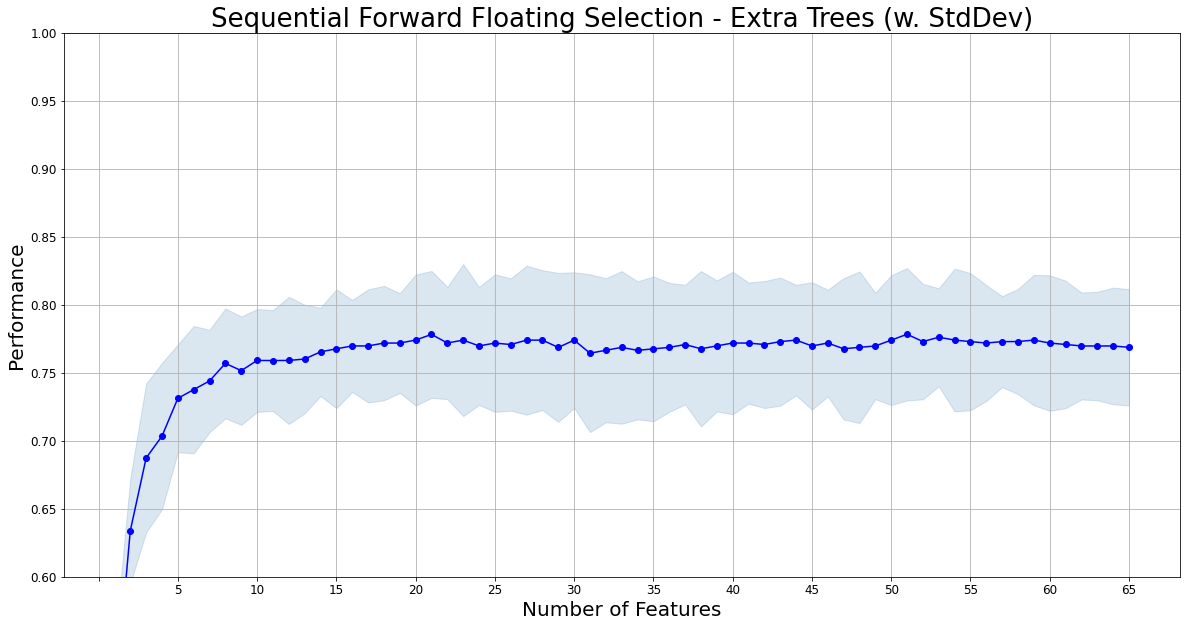

In [67]:
plt.rcParams["figure.figsize"] = (20,10)
fig1 = plot_sfs(sfs_extra.get_metric_dict(), kind='std_dev')

plt.ylim([0.6, 1])
plt.title('Sequential Forward Floating Selection - Extra Trees (w. StdDev)', fontdict ={'size': 26})
plt.xticks(np.arange(0, 66, step=5)) 
plt.grid()
axes = plt.gca()
axes.xaxis.label.set_size(20) #set xaxis label size
axes.yaxis.label.set_size(20)
plt.xticks(fontsize=12) # set x values size
plt.yticks(fontsize=12)


plt.show()

Now we will find the LOO cross validation for the best 21 features where an elbow is made:

In [11]:
extremely_rts_21 = ExtraTreesClassifier(random_state=7, bootstrap=False, criterion='gini',
                                            class_weight= 'balanced', n_estimators=75,
                                            max_depth=None, max_features=None, oob_score=False,
                                            warm_start=True)

scores = cross_val_score(extremely_rts_21, profiles[['reliability_score',
                   'car_use_score',
                   'driver_behavior_score',
                   'distance_per_speed_limit_30_50',
                   'speed_limit_distribution_90_120',
                   'distance_with_temp_ratio',
                   'overspeeding_distance_per_speed_limit_50_70',
                   'overspeeding_distance_per_speed_limit_70_90',
                   'overspeeding_ratio_per_speed_limit_30_50',
                   'overspeeding_ratio_per_speed_limit_70_90',
                   'max_trip_distance',
                   'percentage_charger_nearby',
                   'driver_name_DawidGruszczyski',
                   'driver_name_GrzegorzSynowski',
                   'driver_name_KrzysztofAntecki',
                   'driver_name_MariuszSzymala',
                   'driver_name_Wolny1',
                   'driver_name_ukaszGonta',
                   'driver_name_ukaszKalemba',
                   'body_type_BUS',
                   'monitoring_start_month_1']], 
                         target, cv=loo, scoring='accuracy',n_jobs=-1)
print_scores(scores)

Mean: 0.7516059957173448
Standard Deviation: 0.43208150032034875


Also, trying with smote for the 21 optimal attributes:

In [16]:
pipeline_21 = make_pipeline(SMOTE(sampling_strategy=smote_strategy4, random_state=42),
                         ExtraTreesClassifier(random_state=7, bootstrap=False, criterion='gini',
                                            class_weight= 'balanced', n_estimators=75,
                                            max_depth=None, max_features=None, oob_score=False,
                                            warm_start=True))

scores = cross_val_score(pipeline_21, profiles[['reliability_score',
                   'car_use_score',
                   'driver_behavior_score',
                   'distance_per_speed_limit_30_50',
                   'speed_limit_distribution_90_120',
                   'distance_with_temp_ratio',
                   'overspeeding_distance_per_speed_limit_50_70',
                   'overspeeding_distance_per_speed_limit_70_90',
                   'overspeeding_ratio_per_speed_limit_30_50',
                   'overspeeding_ratio_per_speed_limit_70_90',
                   'max_trip_distance',
                   'percentage_charger_nearby',
                   'driver_name_DawidGruszczyski',
                   'driver_name_GrzegorzSynowski',
                   'driver_name_KrzysztofAntecki',
                   'driver_name_MariuszSzymala',
                   'driver_name_Wolny1',
                   'driver_name_ukaszGonta',
                   'driver_name_ukaszKalemba',
                   'body_type_BUS',
                   'monitoring_start_month_1']], 
                         target, cv=loo, scoring='accuracy',n_jobs=-1)
print_scores(scores)

Mean: 0.7591006423982869
Standard Deviation: 0.4276293454719812


### Random Forest - Features
Using the best random forest to check the feature importances:

In [14]:
forest = RandomForestClassifier(random_state=7, criterion='entropy', bootstrap=True, class_weight=None,
                               max_features=None, n_estimators=175, oob_score=True, warm_start=True)

forest.fit(profiles, target)

RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=175,
                       oob_score=True, random_state=7, warm_start=True)

Finding the feature importances:

In [15]:
feat_importances = pd.Series(forest.feature_importances_, index=profiles.columns)
df_imp_feat = feat_importances.nlargest(profiles.shape[1])

Ploting the results:

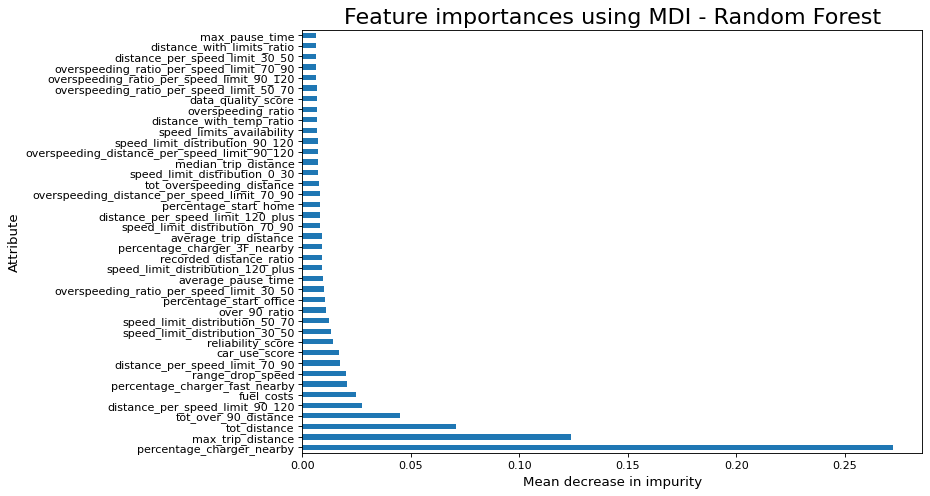

In [16]:
figure(figsize=(10, 7), dpi=80)
df_imp_feat[:40].plot(kind='barh')
plt.title('Feature importances using MDI - Random Forest', fontdict ={'size': 20}, loc='center') #setting title
plt.xlabel('Mean decrease in impurity', fontdict ={'size': 12}) #setting x axis label
plt.ylabel('Attribute',fontdict ={'size': 12})  #setting y axis label
plt.show()

Finding the permutation importances

In [17]:
result = permutation_importance(
    forest, profiles, target, n_repeats=20, random_state=44, n_jobs=7)

forest_importances = pd.Series(result.importances_mean, index=profiles.columns) #saving series 

forest_imp_sorted = forest_importances.nlargest(profiles.shape[1]) #sorting importances

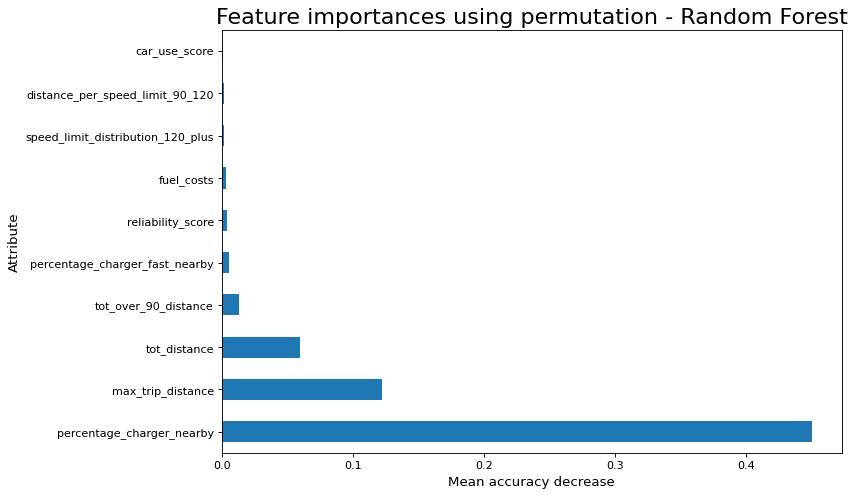

In [18]:
figure(figsize=(10, 7), dpi=80)
forest_imp_sorted[:10].plot(kind='barh')
plt.title('Feature importances using permutation - Random Forest', fontdict ={'size': 20}, loc='center') #setting title
plt.xlabel('Mean accuracy decrease', fontdict ={'size': 12}) #setting x axis label
plt.ylabel('Attribute',fontdict ={'size': 12})  #setting y axis label
plt.show()

#### Feature Selection
Now we will do a sequential feature floating selection for 150 features:

In [22]:
sfs_forest = SFS(forest, 
           k_features= 65, 
           forward=True, 
           floating=True, 
           verbose=1,
           scoring='accuracy',
           cv=fold_10, n_jobs=-1)

sfs_forest = sfs_forest.fit(profiles, target,custom_feature_names=column_names)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed:  1.8min finished
Features: 1/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.0s finished
Features: 2/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   

[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   50.3s finished
Features: 19/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 138 out of 138 | elapsed:  5.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   51.9s finished
Features: 20/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 137 out of 137 | elapsed:  5.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   53.4s finished
Features: 21/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 136 ou

[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:  1.8min finished
Features: 40/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:  5.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.9min finished
Features: 41/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 116 out of 116 | elapsed:  5.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:  2.0min finished
Features: 42/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 115 ou

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:  5.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  2.9min finished
Features: 57/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  3.0min finished
Features: 58/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:  5.2min finished
[

In [23]:
sfs_forest.subsets_

{1: {'feature_idx': (58,),
  'cv_scores': array([0.43617021, 0.46808511, 0.53191489, 0.46808511, 0.49462366,
         0.58064516, 0.50537634, 0.50537634, 0.56989247, 0.52688172]),
  'avg_score': 0.5087051018073667,
  'feature_names': ('max_trip_distance',)},
 2: {'feature_idx': (58, 66),
  'cv_scores': array([0.59574468, 0.65957447, 0.73404255, 0.60638298, 0.58064516,
         0.65591398, 0.64516129, 0.69892473, 0.64516129, 0.60215054]),
  'avg_score': 0.6423701670098376,
  'feature_names': ('max_trip_distance', 'percentage_charger_nearby')},
 3: {'feature_idx': (34, 58, 66),
  'cv_scores': array([0.59574468, 0.73404255, 0.75531915, 0.68085106, 0.64516129,
         0.70967742, 0.74193548, 0.67741935, 0.67741935, 0.72043011]),
  'avg_score': 0.69380004575612,
  'feature_names': ('tot_distance',
   'max_trip_distance',
   'percentage_charger_nearby')},
 4: {'feature_idx': (4, 34, 58, 66),
  'cv_scores': array([0.67021277, 0.72340426, 0.74468085, 0.72340426, 0.69892473,
         0.6881720

Let's visualize the results:

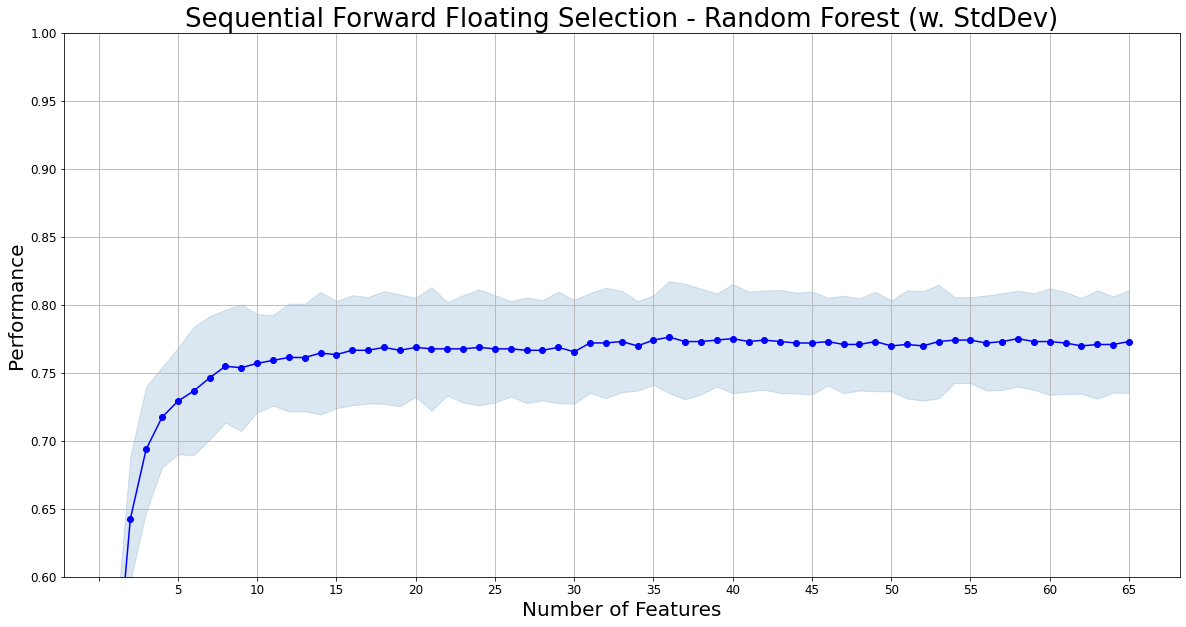

In [24]:
plt.rcParams["figure.figsize"] = (20,10)
fig3 = plot_sfs(sfs_forest.get_metric_dict(), kind='std_dev')

plt.ylim([0.6, 1])
plt.title('Sequential Forward Floating Selection - Random Forest (w. StdDev)', fontdict ={'size': 26})
plt.xticks(np.arange(0, 66, step=5)) 
plt.grid()
axes = plt.gca()
axes.xaxis.label.set_size(20) #set xaxis label size
axes.yaxis.label.set_size(20)
plt.xticks(fontsize=12) # set x values size
plt.yticks(fontsize=12)


plt.show()

Use 15 attributes to check LOO cross-validation:

In [ ]:
forest_15 = RandomForestClassifier(random_state=7, criterion='gini',
                                            class_weight= 'balanced', n_estimators=100,
                                            max_depth=None, max_features=None, oob_score=False,
                                            warm_start=True)

scores = cross_val_score(forest_15, profiles[['overspeeding_distance',
                           'distance_per_speed_limit_30_50','distance_per_speed_limit_90_120',
                           'overspeeding_distance_per_speed_limit_70_90', 'max_trip_distance',
                           'percentage_charger_nearby','model_MONDEO','model_PARTNER',
                           'first_registration_20180528','first_registration_20191210',
                           'next_registration_exam_20210627','insurance_expiration_20191227',
                           'insurance_expiration_20200524','location_Katowice',
                           'driver_name_SylwiaCzarneckaKlimaszewska']], 
                         target, cv=loo, scoring='accuracy',n_jobs=-1)
print_scores(scores)

###  XGBoost - Feature Selection
Now we will do a sequential feature floating selection for 60 features:

In [26]:
clf = XGBClassifier(seed=7, num_class=5, base_score=0.5, booster='dart', eta=0.3,
                                           eval_metric='merror', max_depth=6, objective='reg:logistic',
                                           rate_drop=0, validate_parameters=True)

clf.fit(profiles, target)

C:\Users\stef4\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.3, eval_metric='merror', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_class=5, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=7,
              rate_drop=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=7, ...)

Now feature selection is exectuted:

In [27]:
sfs_xgb = SFS(clf, 
           k_features= 65, 
           forward=True, 
           floating=True, 
           verbose=1,
           scoring='accuracy',
           cv=fold_10, n_jobs=-1)

sfs_xgb = sfs_xgb.fit(profiles, target,custom_feature_names=column_names)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed: 12.0min finished
Features: 1/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed: 12.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.3s finished
Features: 2/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 155 out of 155 | elapsed: 12.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   18.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.4min finished
Features: 21/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed: 16.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  2.5min finished
Features: 22/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 16.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  2.6min finished
Features: 23/65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 134 ou

In [30]:
sfs_xgb.subsets_

{1: {'feature_idx': (66,),
  'cv_scores': array([0.41489362, 0.46808511, 0.60638298, 0.4787234 , 0.40860215,
         0.53763441, 0.53763441, 0.49462366, 0.51612903, 0.48387097]),
  'avg_score': 0.4946579730038893,
  'feature_names': ('percentage_charger_nearby',)},
 2: {'feature_idx': (58, 66),
  'cv_scores': array([0.58510638, 0.65957447, 0.72340426, 0.64893617, 0.60215054,
         0.66666667, 0.67741935, 0.65591398, 0.66666667, 0.64516129]),
  'avg_score': 0.6530999771219401,
  'feature_names': ('max_trip_distance', 'percentage_charger_nearby')},
 3: {'feature_idx': (58, 60, 66),
  'cv_scores': array([0.65957447, 0.67021277, 0.76595745, 0.71276596, 0.64516129,
         0.66666667, 0.65591398, 0.6344086 , 0.7311828 , 0.70967742]),
  'avg_score': 0.6851521390986045,
  'feature_names': ('max_trip_distance',
   'average_pause_time',
   'percentage_charger_nearby')},
 4: {'feature_idx': (34, 58, 60, 66),
  'cv_scores': array([0.61702128, 0.72340426, 0.74468085, 0.68085106, 0.68817204,
 

Let's visualize the results:

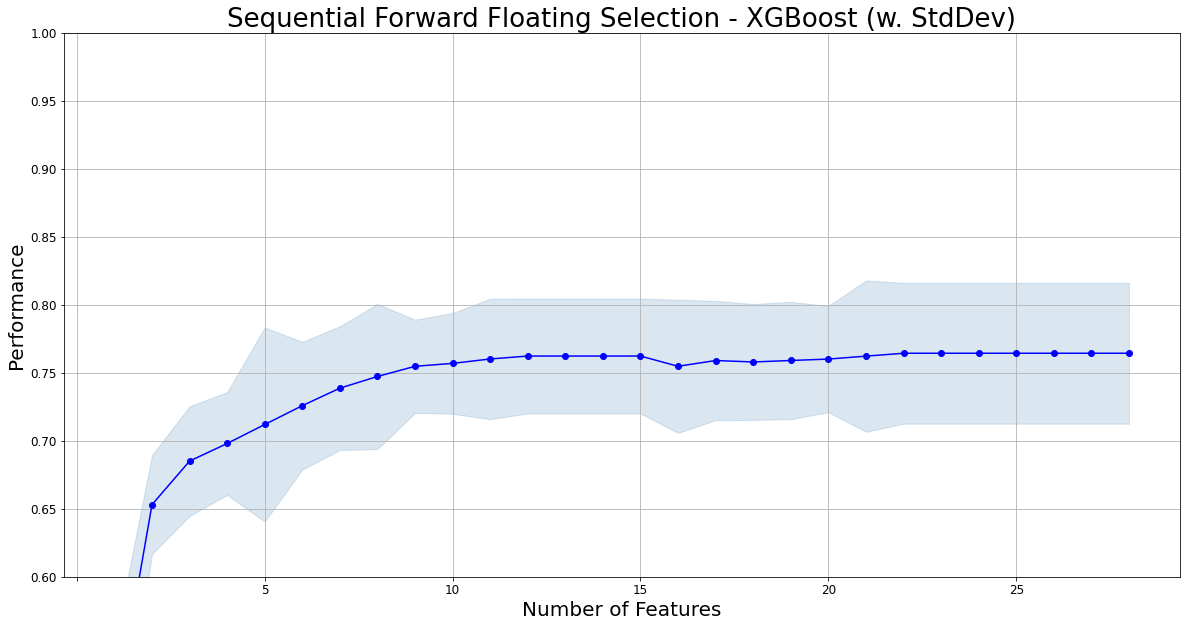

In [31]:
plt.rcParams["figure.figsize"] = (20,10)
fig3 = plot_sfs(sfs_xgb.get_metric_dict(), kind='std_dev')

plt.ylim([0.6, 1])
plt.title('Sequential Forward Floating Selection - XGBoost (w. StdDev)', fontdict ={'size': 26})
plt.xticks(np.arange(0, 29, step=5)) 
plt.grid()
axes = plt.gca()
axes.xaxis.label.set_size(20) #set xaxis label size
axes.yaxis.label.set_size(20)
plt.xticks(fontsize=12) # set x values size
plt.yticks(fontsize=12)


plt.show()

### Fine tuning the parameters for smote & extra trees
Using the smote_strategy4 that produced the best results before

In [11]:
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

We will use bayesian fine tuning to find the best number of n_estimators:

In [39]:
n_features =profiles.shape[1] #number of columns
imba_pipeline = make_pipeline(SMOTE(sampling_strategy=smote_strategy4, random_state=42), 
                              ExtraTreesClassifier(random_state=7, bootstrap=False,
                                                  class_weight= None,
                                                  max_depth=None, max_features=None, oob_score=False,
                                                  warm_start=True, criterion='entropy'))

# The list of hyper-parameters we want to optimize
space  = [Integer(50, 120, name='extratreesclassifier__n_estimators'),
         ]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    imba_pipeline.set_params(**params)
    
    return np.mean(cross_val_score(imba_pipeline, profiles, target, cv=fold_20, n_jobs=-1,
                                    scoring="accuracy"))

Implementing the optimization:

In [36]:
res_gp = gp_minimize(objective, space, n_calls=80, random_state=1)

"Best score=%.4f" % res_gp.fun

C:\Users\stef4\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\stef4\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\stef4\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\stef4\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\stef4\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\stef4\

'Best score=0.7518'

Optimal number of hyper-parameter:

In [37]:
res_gp.x

[52]

Now we retrain the model with the optimal number of `n_estimators`:

In [27]:
imba_pipeline = make_pipeline(SMOTE(sampling_strategy=smote_strategy4, random_state=42), 
                              ExtraTreesClassifier(random_state=7, bootstrap=False,
                                                  class_weight= None,
                                                  max_depth=None, max_features=None, oob_score=False,
                                                  warm_start=True,
                                                  n_estimators=52,
                                                  criterion='entropy'))

scores = cross_val_score(imba_pipeline, profiles, target, cv=loo, scoring='accuracy',n_jobs=-1)
print_scores(scores)

Mean: 0.7623126338329764
Standard Deviation: 0.4256666326265272


Now we will try the same process for the optimal 21 attributes found before with feature selection:

In [43]:
n_features = 21 #number of columns
pipeline_21 = make_pipeline(SMOTE(sampling_strategy=smote_strategy4, random_state=42),
                         ExtraTreesClassifier(random_state=7, bootstrap=False, criterion='gini',
                                            class_weight= 'balanced', max_depth=None, 
                                            max_features=None, oob_score=False,
                                            warm_start=True))

# The list of hyper-parameters we want to optimize
space  = [Integer(50, 120, name='extratreesclassifier__n_estimators'),
         ]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    pipeline_21.set_params(**params)
    
    return np.mean(cross_val_score(pipeline_21, profiles[['reliability_score',
                                   'car_use_score','driver_behavior_score',
                                   'distance_per_speed_limit_30_50','speed_limit_distribution_90_120',
                                   'distance_with_temp_ratio','overspeeding_distance_per_speed_limit_50_70',
                                   'overspeeding_distance_per_speed_limit_70_90','overspeeding_ratio_per_speed_limit_30_50',
                                   'overspeeding_ratio_per_speed_limit_70_90','max_trip_distance',
                                   'percentage_charger_nearby','driver_name_DawidGruszczyski',
                                   'driver_name_GrzegorzSynowski','driver_name_KrzysztofAntecki',
                                   'driver_name_MariuszSzymala','driver_name_Wolny1',
                                   'driver_name_ukaszGonta','driver_name_ukaszKalemba',
                                   'body_type_BUS','monitoring_start_month_1']],
                                   target, cv=fold_20, n_jobs=-1,
                                    scoring="accuracy"))

In [44]:
res_gp = gp_minimize(objective, space, n_calls=80, random_state=1)

"Best score=%.4f" % res_gp.fun

C:\Users\stef4\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\stef4\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\stef4\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\stef4\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\stef4\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\stef4\

'Best score=0.7444'

In [45]:
res_gp.x

[98]

Using LOO cross validation:

In [47]:
pipeline_21 = make_pipeline(SMOTE(sampling_strategy=smote_strategy4, random_state=42), 
                              ExtraTreesClassifier(random_state=7, bootstrap=False, criterion='gini',
                                            class_weight= 'balanced', max_depth=None, max_features=None, oob_score=False,
                                            warm_start=True, n_estimators=98))

scores = cross_val_score(pipeline_21, profiles[['reliability_score',
                                   'car_use_score','driver_behavior_score',
                                   'distance_per_speed_limit_30_50','speed_limit_distribution_90_120',
                                   'distance_with_temp_ratio','overspeeding_distance_per_speed_limit_50_70',
                                   'overspeeding_distance_per_speed_limit_70_90','overspeeding_ratio_per_speed_limit_30_50',
                                   'overspeeding_ratio_per_speed_limit_70_90','max_trip_distance',
                                   'percentage_charger_nearby','driver_name_DawidGruszczyski',
                                   'driver_name_GrzegorzSynowski','driver_name_KrzysztofAntecki',
                                   'driver_name_MariuszSzymala','driver_name_Wolny1',
                                   'driver_name_ukaszGonta','driver_name_ukaszKalemba',
                                   'body_type_BUS','monitoring_start_month_1']],
                                    target, cv=loo, scoring='accuracy',n_jobs=-1)
print_scores(scores)

Mean: 0.7580299785867237
Standard Deviation: 0.4282762311295536


### Predictions - Percentages
A very good use of the extra trees is that they can calculate the probability of a profile to belong to any class.

Firstly, we split the data into training and testing:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( profiles, target, test_size=0.01, random_state=7)

In [17]:
extra_pipeline = make_pipeline(SMOTE(sampling_strategy=smote_strategy4, random_state=42), 
                              ExtraTreesClassifier(random_state=7, bootstrap=False,
                                                  class_weight= None,
                                                  max_depth=None, max_features=None, oob_score=False,
                                                  warm_start=True,
                                                  n_estimators=52,
                                                  criterion='entropy'))

extra_pipeline.fit(X_train,y_train)

C:\Users\stef4\anaconda3\lib\site-packages\imblearn\utils\_validation.py:318: UserWarning: After over-sampling, the number of samples (375) in class 1 will be larger than the number of samples in the majority class (class #1 -> 373)
  warnings.warn(


Pipeline(steps=[('smote',
                 SMOTE(random_state=42,
                       sampling_strategy={0: 95, 1: 375, 2: 207, 3: 198,
                                          4: 67})),
                ('extratreesclassifier',
                 ExtraTreesClassifier(criterion='entropy', max_features=None,
                                      n_estimators=52, random_state=7,
                                      warm_start=True))])

In [18]:
classes = ['no recommendation', 'dissapointing real_score',
           'low real_score', 'good real_score', 'perfect real_score']

#### First incident
Let's see the probabilitites for the first profile of the test data. Each list's item is a probability and the index of the item corresponds to the below classes:

In [19]:
index = 0
X = X_test[index : index+1]
position = np.where(extra_pipeline.predict_proba(X)[0] == max(extra_pipeline.predict_proba(X)[0]))
print(extra_pipeline.predict_proba(X)[0])
classes

[0.19230769 0.         0.05769231 0.75       0.        ]


['no recommendation',
 'dissapointing real_score',
 'low real_score',
 'good real_score',
 'perfect real_score']

Here we can see the class that is predicted (the class that corresponds to the highest probability). This profile is predicted with 75% to belong to the class 3 which is a real_score less than 10 but higher or equal to 6.5

In [20]:
print(extra_pipeline. classes_[position])
classes[position[0][0]]

[3]


'good real_score'

We can see that the prediction is actually true:

In [21]:
classes[y_test.iloc[index]]

'good real_score'

#### Second incident

In [24]:
index = 2
X = X_test[index : index+1]
position = np.where(extra_pipeline.predict_proba(X)[0] == max(extra_pipeline.predict_proba(X)[0]))
print(extra_pipeline.predict_proba(X)[0])
classes

[0.19230769 0.71153846 0.09615385 0.         0.        ]


['no recommendation',
 'dissapointing real_score',
 'low real_score',
 'good real_score',
 'perfect real_score']

Here we can see the class that is predicted (the class that corresponds to the highest probability). This profile is predicted with 75% to belong to the class 3 which is a real_score less than 10 but higher or equal to 6.5

In [25]:
print(extra_pipeline. classes_[position])
classes[position[0][0]]

[1]


'dissapointing real_score'

We can see that the prediction is actually true:

In [26]:
classes[y_test.iloc[index]]

'dissapointing real_score'

#### Another incident
Let's see the probabilitites for the fourth profile of the test data

In [137]:
index= 4
X = X_test[index : index+1]
position = np.where(extra_pipeline.predict_proba(X)[0] == max(extra_pipeline.predict_proba(X)[0]))
print(extra_pipeline.predict_proba(X)[0])

[0.38461538 0.25       0.36538462 0.         0.        ]


The prediction is no EV recommendations with 38.4%

In [138]:
print(extra_pipeline. classes_[position])
classes[position[0][0]]

[0]


'no recommendation'

The actual class is seen here.
The prediction is incorrect this time

In [139]:
classes[y_test.iloc[index]]

'low real_score'

This time the prediction may not be correct but the second highest probability (36.5%) would be correct.

### Visualizations
Now let's show the accuracies of the models:

In [5]:
import seaborn as sns

accuracies = {'Decision trees': 0.6381156316916489,
              'Random forest': 0.7408993576017131,
              'Extra trees': 0.7408993576017131,
              'Bagging classifier': 0.4004282655246253,
              'AdaBoost classifier': 0.6605995717344754,
              'Naive Baynes': 0.5995717344753747,
              'SVC': 0.6916488222698073,
              'SGD': 0.6991434689507494,
              'KNeighbors': 0.4443254817987152,
              'Logistic regression': 0.7205567451820128,
              'LightGBM': 0.7366167023554604,
              'XGBoost': 0.7408993576017131,
              
              'PCA & SVC': 0.7012847965738758,
              'PCA & Random forest': 0.6702355460385439,
              'PCA & Naive Baynes': 0.619914346895075,
              'PCA & Logistic regression': 0.7312633832976445,

              'Neural Network': 0.7130620985010707,

              'Smote & Extra trees': 0.7623126338329764,
              'Randomoversampler & Extra trees': 0.7441113490364025,
              'Smote & Random forest': 0.7430406852248393,
              'Randomoversampler & Random forest': 0.7441113490364025,
              'Smote & XGBoost': 0.7376873661670236,
              'Randomoversampler & XGBoost': 0.734475374732334,


              'Dummy classifier': 0.4014989293361884
    
}

Sorting the dic:

In [6]:
import operator
accuracies = dict( sorted(accuracies.items(), key=operator.itemgetter(1),reverse=True))

Showing the results:

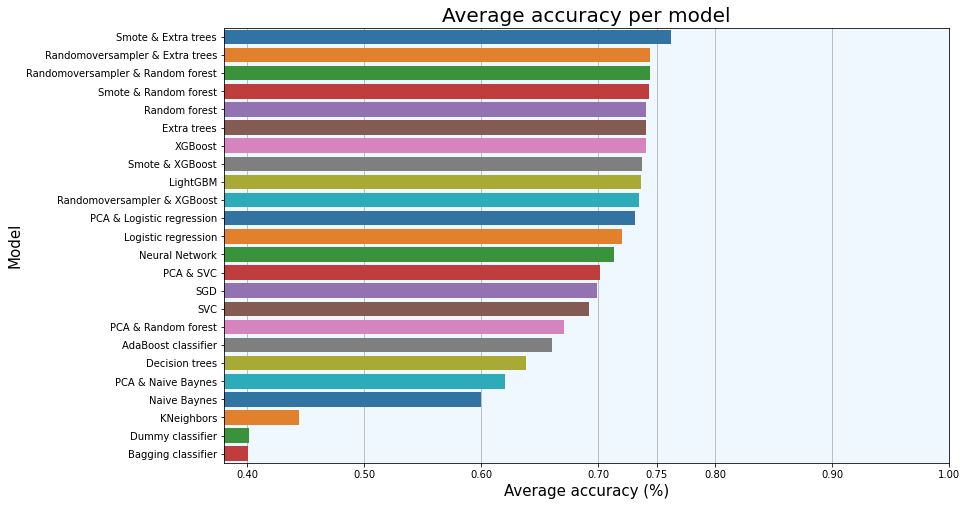

In [7]:
fig_dims = (13, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y=list(accuracies.keys()), x=list(accuracies.values()), palette='tab10',)
plt.title('Average accuracy per model', fontdict ={'size': 20})
plt.ylabel('Model', fontdict ={'size': 15})
plt.xlabel('Average accuracy (%)',fontdict ={'size': 15})
ax.set_facecolor("aliceblue") #setting background color
plt.xticks([0.4,0.5,0.6,0.7,0.75,0.8,0.9,1])
plt.xlim([0.38, 1])
ax.set_axisbelow(True)
plt.grid(axis = 'x')
plt.show()